# Optimisation

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']
       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
4                 NaN            0.000000       NaN         385.000000   
5                 NaN            0.000000       NaN         470.000000   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.

/tmp/ipykernel_85/1175417484.py:25: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))


RMSE_model = 9.246
R2_score_model = 0.899


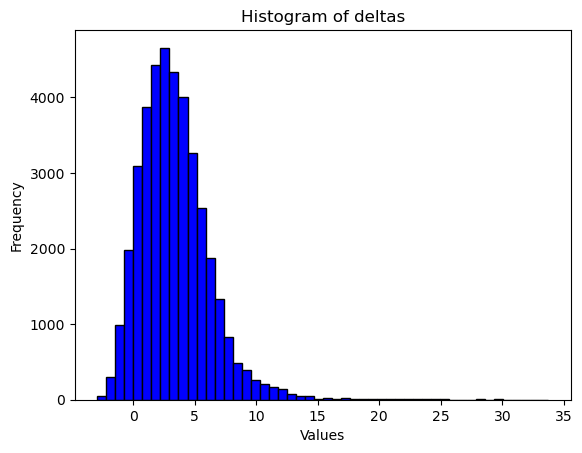

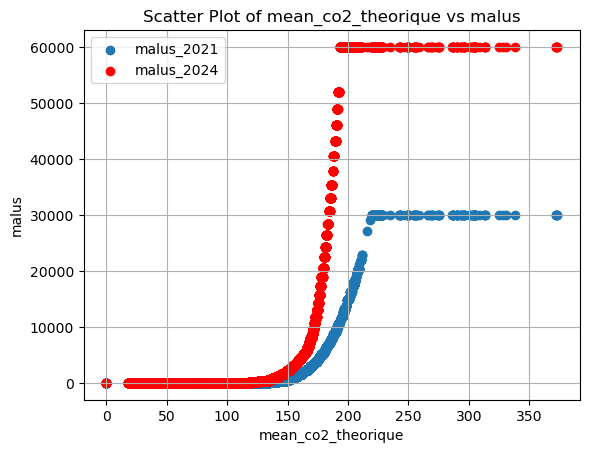

698.8260891552252
187.87181296990966
['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']
       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
4                 NaN            0.000000       NaN         385.000000   
5                 NaN            0.000000       NaN         470.000000   
...               ...                 ...       ...                ...   
54158        

/tmp/ipykernel_85/1175417484.py:25: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))


RMSE_model = 9.318
R2_score_model = 0.896


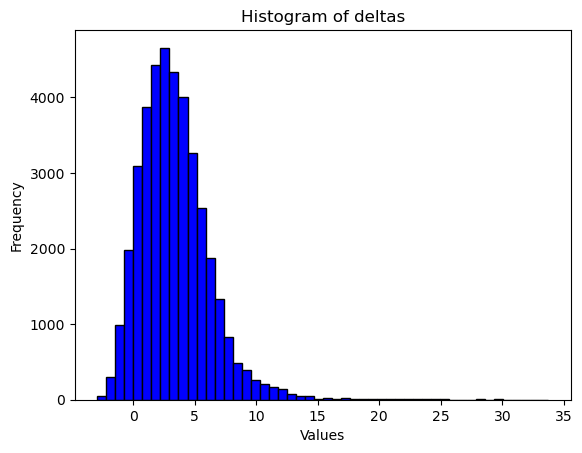

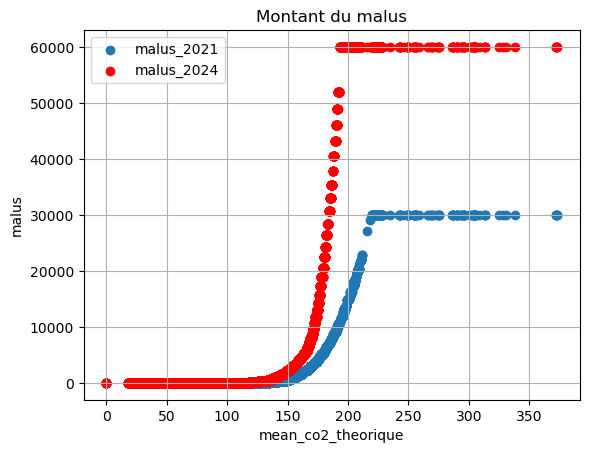

698.8260891552252
187.87181296990966


In [556]:
# On fait tourner le fichier de categorisation.
#%run -i -e ./categorisation_vehicules_eva_(3).ipynb --no output
#%run -i -e ./categorisation_du_malus2021.ipynb --no output
#%run -i -e ./impact_malus_sur_emissions_AM_reduced.ipynb --no output
%run -i -e ./categorisation24plus.ipynb --no output


In [557]:
print("taille p:",p.size)
print("taille CO2reel:",CO2reel.size)
print("taille CO2theorique:",CO2theorique.size)

taille p: 90
taille CO2reel: 90
taille CO2theorique: 90


In [558]:
p.dropna(inplace=True)
CO2reel.dropna(inplace=True)
CO2theorique.dropna(inplace=True)

## 1. Explication du modele

Soit m $\in \mathbb{R^n}$ le malus appliqué pour chacune des n catégories.

Soit p $\in \mathbb{R^n}$ le prix moyen des véhicules de chacune des n catégories.

Soit $ \beta $ le coefficient de prix (??)

Dans le modèle logit, la part de marché d'un modèle i de prix est donnée par:
$ \frac{e^{\beta * p_{i}} }{ \sum_{k=1}^{n} e^{\beta * p_{k}}}$

Après malus, la nouvelle part de marché du modèle i est donc : 
$ \frac{e^{\beta * (p_{i}+m_{i})} }{ \sum_{k=1}^{n} e^{\beta * (p_{k}+m_{k})}}$

La fonction d'utilité choisie est : 

utilite(m)= $ \sum_{k=1}^{n} \frac{m_k}{p_k}$ * ( nouvelle part du marche du modele k) 

In [559]:
from scipy.optimize import minimize

La fonction de contrainte du malus vise à ce que les émissions moyennes de CO2 soient en dessous d'un certain seuil et est donc donnée par :

$\sum_{k=1}^{n}$ parts du marché du véhicule k x CO2 réel emis par le modele k

In [560]:
p #moyenne des prix par catégorie

CO2bins
[0, 60)       48424.338402
[60, 90)      46524.975766
[90, 100)     50136.850764
[100, 117)    28936.667429
[117, 118)    29230.459290
                  ...     
[206, 209)    54331.880859
[209, 212)    42323.159395
[212, 215)    73564.338028
[215, 218)    56419.785791
[218, 420)    77440.391569
Length: 90, dtype: float64

In [561]:
CO2reel

CO2bins
[0, 60)        59.642660
[60, 90)       82.831010
[90, 100)      93.482476
[100, 117)    112.482668
[117, 118)    123.399100
                 ...    
[206, 209)    201.725621
[209, 212)    202.791393
[212, 215)    210.685016
[215, 218)    200.495943
[218, 420)    247.397470
Length: 90, dtype: float64

In [562]:
print("taille p:",p.size)
print("taille CO2reel:",CO2reel.size)
print("taille CO2theorique:",CO2theorique.size)

taille p: 90
taille CO2reel: 90
taille CO2theorique: 90


In [563]:
CO2theorique

CO2bins
[0, 60)        18.598868
[60, 90)       31.338861
[90, 100)      41.441152
[100, 117)     88.334203
[117, 118)    107.688594
                 ...    
[206, 209)    177.376638
[209, 212)    189.730219
[212, 215)    179.447988
[215, 218)    176.753360
[218, 420)    210.097109
Length: 90, dtype: float64

In [564]:
valeur_entiere_liste=np.vectorize(int)

## PARTIE 4

## 2. ON CODE LES MALUS

In [565]:
malus_2021_df = pd.read_excel('malus_2021.xlsx')

# https://www.service-public.fr/particuliers/vosdroits/F35947

malus_2021_df.rename(columns={"Taux d'émission de CO2 par kilomètre": "CO2"}, inplace=True) # colonnes ['CO2', 'Montant']

def malus_etat_2021(c):
    if int(c)<=132:
        return 0
    if int(c)>=219:
        return 30000
    else:
        return int(malus_2021_df.loc[malus_2021_df['CO2'] == int(c),'Montant'])
    
malus_etat_2021_vf = np.vectorize(malus_etat_2021)

#ancien malus 2021 = malus_etat_2021_vf(CO2reel)

In [566]:
malus_2024_df = pd.read_excel('malus_2024.xlsx')

# https://www.service-public.fr/particuliers/vosdroits/F35947

malus_2024_df.rename(columns={"Taux d'émission de CO2 par kilomètre": "CO2"}, inplace=True) # colonnes ['CO2', 'Montant']

def malus_etat_2024(c):
    if int(c)<=117:
        return 0
    if int(c)>=193:
        return 60000
    else:
        return int(malus_2024_df.loc[malus_2024_df['CO2'] == str(int(c))+ ' g','Montant'])
    
malus_etat_2024_vf = np.vectorize(malus_etat_2024)

In [567]:
datap['malus_2021'] = datap['mean_co2_theorique'].apply(malus_etat_2021) + 0 # co2 theorique
datap['malus_2021']

0        30000
1          360
3            0
7            0
9            0
         ...  
54157        0
54158        0
54202        0
54203        0
54204        0
Name: malus_2021, Length: 39549, dtype: int64

In [568]:
datap['malus_2024'] = datap['mean_co2_theorique'].apply(malus_etat_2024_vf) + 0 # co2 theorique
datap['malus_2024']

0        60000
1         1761
3            0
7            0
9            0
         ...  
54157      240
54158      240
54202      230
54203      230
54204      230
Name: malus_2024, Length: 39549, dtype: int64

In [569]:
nb_par_bin = datap.groupby('CO2bins')['VOLUME'].sum()
datap['malus2021Volume']= datap['malus_2021']* datap['VOLUME']
malus_2021_theorique = (datap.groupby('CO2bins')['malus2021Volume'].sum()) / nb_par_bin
malus_2021_theorique.dropna(inplace=True) # malus 2021 theorique appliqué aux categorissation du malus 2024 réel

In [570]:
datap['malus2021ReelVolume']= datap['malus_2021_reel']* datap['VOLUME']
malus_2021_reel = (datap.groupby('CO2bins')['malus2021ReelVolume'].sum()) / nb_par_bin
malus_2021_reel.dropna(inplace=True) # malus 2021 theorique appliqué aux categorissation du malus 2024 réel

In [571]:
datap['malus2024Volume']= datap['malus_2024']* datap['VOLUME']
malus_2024_theorique = (datap.groupby('CO2bins')['malus2024Volume'].sum()) / nb_par_bin
malus_2024_theorique.dropna(inplace=True) # malus 2024 theorique appliqué aux categorissation du malus 2024 réel

In [572]:
malus_2024_reel = datap.groupby('CO2bins')['malus_2024_reel'].min()
malus_2024_reel.dropna(inplace=True)

In [573]:
malus_2021_theorique.dropna(inplace=True)
malus_2024_theorique.dropna(inplace=True)

In [574]:
malus_2021_reel

CO2bins
[0, 60)           0.000000
[60, 90)          0.000000
[90, 100)         0.000000
[100, 117)        0.000000
[117, 118)        0.000000
                  ...     
[206, 209)    19423.066406
[209, 212)    21296.884235
[212, 215)    23909.678404
[215, 218)    27314.558761
[218, 420)    29974.365626
Length: 90, dtype: float64

In [575]:
#malus_2021 = malus_etat_2021_vf(CO2reel)
#malus_2021_theorique= malus_etat_2021_vf(CO2theorique)

In [576]:
#malus_2024 = malus_etat_2024_vf(CO2reel)
#malus_2024_theorique= malus_etat_2024_vf(CO2theorique)

In [577]:
malus_2024_theorique

CO2bins
[0, 60)           0.000000
[60, 90)          0.000000
[90, 100)         0.000000
[100, 117)        0.000000
[117, 118)        0.000000
                  ...     
[206, 209)    22347.443359
[209, 212)    44880.061082
[212, 215)    21776.117371
[215, 218)    45923.521902
[218, 420)    44285.210377
Length: 90, dtype: float64

## 3. ON CALIBRE LE MODELE LOGIT

In [578]:
# valeurs exemples de variables clés de l'optimisation
beta = -0.00015 # valeur d'Etienne : -0.01414

# vecteur prix par catégorie p

# vecteur CO2estimé par catégorie CO2reel

nb_categories = p.shape[0]
# le malus inital
m_guess = np.zeros(nb_categories)

In [579]:
nb_categories

90

### ATTENTION ICI EST CALCULE LE DELTA

In [580]:
# delta = beta*(p.iloc[len(p)-1]-p)

In [581]:
p2021 = p + malus_2021_theorique # on a rajouté le malus 2021 car les ventes observées en 2021 subissent l'effet du malus

In [582]:
p2024 = p + malus_2024_theorique

In [583]:
quantite = datap.groupby('CO2bins')['VOLUME'].sum()
quantite = quantite[quantite > 0]
quantite

CO2bins
[0, 60)        6773
[60, 90)      77991
[90, 100)      8376
[100, 117)    96605
[117, 118)    10366
              ...  
[206, 209)      512
[209, 212)     1719
[212, 215)      426
[215, 218)     1872
[218, 420)     2467
Name: VOLUME, Length: 90, dtype: int64

In [584]:
p

CO2bins
[0, 60)       48424.338402
[60, 90)      46524.975766
[90, 100)     50136.850764
[100, 117)    28936.667429
[117, 118)    29230.459290
                  ...     
[206, 209)    54331.880859
[209, 212)    42323.159395
[212, 215)    73564.338028
[215, 218)    56419.785791
[218, 420)    77440.391569
Length: 90, dtype: float64

In [585]:
#delta = beta*(p['prix'].loc[c]-p['prix'])+np.log(p['Quantité']/(p['Quantité'].loc[c]))
#delta = beta*(p['prix'].iloc[len(p)-1]-p['prix'])+np.log(p['Quantité']/(p['Quantité'].loc[c]))
#delta = beta*(p2021.iloc[len(p2021)-1]-p2021) + np.log(quantite/(quantite.iloc[len(p)-1]))

In [586]:
#delta = beta*(p2024.iloc[len(p2024)-1]-p2024) + np.log(quantite/(quantite.iloc[len(p)-1]))

In [587]:
delta = beta*(p2021.iloc[len(p2021)-1]-p2021) + np.log(quantite/(quantite.iloc[len(p)-1]))

### FIN DU CALCUL DU DELTA

In [588]:
def part_de_marche(m):
    pexp = np.exp(  delta + beta * (p + m))
    pit = pexp / np.sum(pexp)
    return pit

In [589]:
malus_2021_theorique

CO2bins
[0, 60)           0.000000
[60, 90)          0.000000
[90, 100)         0.000000
[100, 117)        0.000000
[117, 118)        0.000000
                  ...     
[206, 209)     5425.035156
[209, 212)     9443.837696
[212, 215)     5565.115023
[215, 218)    10801.862714
[218, 420)    15317.247264
Length: 90, dtype: float64

In [590]:
malus_2024_theorique

CO2bins
[0, 60)           0.000000
[60, 90)          0.000000
[90, 100)         0.000000
[100, 117)        0.000000
[117, 118)        0.000000
                  ...     
[206, 209)    22347.443359
[209, 212)    44880.061082
[212, 215)    21776.117371
[215, 218)    45923.521902
[218, 420)    44285.210377
Length: 90, dtype: float64

In [591]:
pi = np.exp(delta+beta*p2024)/sum(np.exp(delta+beta*p2024))
pi

CO2bins
[0, 60)       0.005300
[60, 90)      0.061032
[90, 100)     0.006555
[100, 117)    0.075599
[117, 118)    0.008112
                ...   
[206, 209)    0.000032
[209, 212)    0.000007
[212, 215)    0.000029
[215, 218)    0.000008
[218, 420)    0.000025
Length: 90, dtype: float64

In [592]:
delta

CO2bins
[0, 60)      -5.640054
[60, 90)     -3.481309
[90, 100)    -5.170751
[100, 117)   -5.905518
[117, 118)   -8.093549
                ...   
[206, 209)   -6.522542
[209, 212)   -6.509856
[212, 215)   -3.800547
[215, 218)   -4.106394
[218, 420)    0.000000
Length: 90, dtype: float64

In [593]:
delta.mean()

-7.101691360635859

## 4. Variations de part de marché 2021, 2024, CO2 réel, CO2 théorique

In [594]:
# Fonction d'utilité
def utility_function(m):
    pexp = np.exp(beta*(p+m))
    pit = pexp/np.sum(pexp)
    return(-np.sum(m*pit/p))

def utility_function_2(m):
    pexp = np.exp(delta+beta*(p+m))
    pit = pexp/np.sum(pexp)
    return(-np.sum(pexp*pit))

def utility_function_3(m):
    pexp = np.exp(delta+beta*(p+m))
    return(-np.sum(pexp))

# Fonction de contrainte  = moyenne des emissions réelles sur chacune des categories
def constraint_function(m):
    pexp = np.exp(delta+beta*(p+m))
    pit = pexp/np.sum(pexp)
    return(np.sum(pit*CO2reel))

print(m_guess.shape)
print(p.shape)
print(CO2reel.shape)
utility_function(m_guess)
#bins_limits

(90,)
(90,)
(90,)


-0.0

In [595]:
constraint_function(malus_2021_reel) #b

138.27117549998144

In [596]:
constraint_function(malus_2021_theorique) #a

141.09561803377122

In [597]:
constraint_function(malus_2024_reel)# le b : emissions reelles avec malus 2024 appliquées au CO2 reel

134.46363368344996

In [598]:
constraint_function(malus_2024_theorique) # le a: emissions reelles avec malus 2024 appliquées au CO2 theorique

139.3350136733735

In [599]:
constraint_function(m_guess)

143.9769032371194

In [600]:
malus_2024_reel

CO2bins
[0, 60)           0
[60, 90)          0
[90, 100)         0
[100, 117)        0
[117, 118)        0
              ...  
[206, 209)    60000
[209, 212)    60000
[212, 215)    60000
[215, 218)    60000
[218, 420)    60000
Name: malus_2024_reel, Length: 90, dtype: int64

In [601]:
nb_categories

90

In [602]:
intervals = p.index
l=[]
# Parcourir les intervalles et afficher les limites
for interval in intervals:
    lower_limit, upper_limit = str(interval).strip('[]').split(', ')
    l.append(int(lower_limit))
l.append(int(upper_limit[:-1]))

In [603]:
delta = beta*(p2021.iloc[len(p2021)-1]-p2021) + np.log(quantite/(quantite.iloc[len(p)-1]))
def part_de_marche(m):
    pexp = np.exp(  delta + beta * (p + m))
    pit = pexp / np.sum(pexp)
    return pit

index: 90
malus_2024.reel.size 90
part_de_marche_avec_malus_etat_corr 90


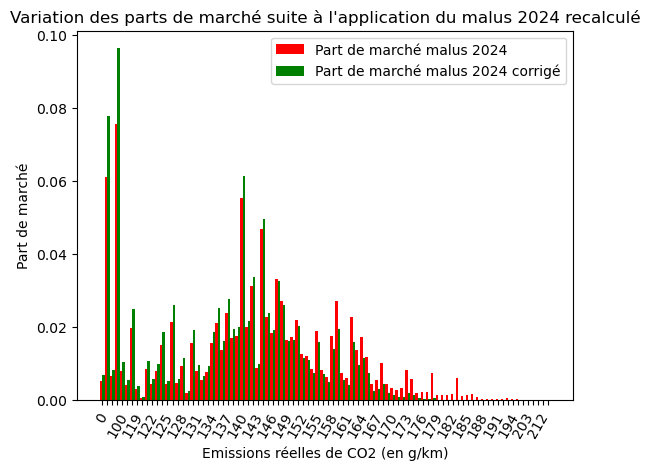

In [604]:
# part de marche en fonction du malus
part_de_marche_avec_malus_etat = part_de_marche(malus_2024_theorique) #renvoit ventes de chaque categorie de CO2 avec le malus 2021 calculé à partir des émissions théoriques
part_de_marche_avec_malus_etat_corr = part_de_marche(malus_2024_reel) #renvoit ventes de chaque categorie de CO2 avec mallus 2021 et calcul des émissions rélles


# tracé de l'histogramme avec deux barres pour chaque catégorie
fig, ax =plt.subplots()

bar_width= 0.5
index=np.arange(nb_categories)

print("index:", index.size)
print("malus_2024.reel.size", malus_2024_reel.size)
print("part_de_marche_avec_malus_etat_corr", part_de_marche_avec_malus_etat_corr.size)

bar1=ax.bar(index, part_de_marche_avec_malus_etat, bar_width, label='Part de marché malus 2024', color='red')
bar2=ax.bar([i + bar_width for i in index], part_de_marche_avec_malus_etat_corr, bar_width, label='Part de marché malus 2024 corrigé', color='green')

def set_None(liste):
    for i in range(1, len(liste), 2):
        liste[i] = None
    return(liste)

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Ajout de légendes, titres, et labels
ax.set_xlabel('Emissions réelles de CO2 (en g/km)')
ax.set_ylabel('Part de marché')
ax.set_title("Variation des parts de marché suite à l'application du malus 2024 recalculé")
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(valeur_entiere_liste(l[:-1]), rotation =60)
ax.legend()

# Affichage de l'histogramme
plt.show()
#plt.legend()

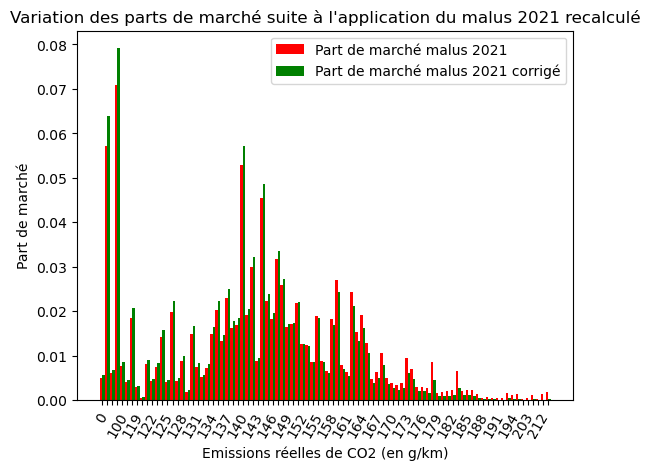

In [605]:
# part de marche en fonction du malus
part_de_marche_avec_malus_etat = part_de_marche(malus_2021_theorique) #renvoit ventes de chaque categorie de CO2 avec le malus 2021 calculé à partir des émissions théoriques
part_de_marche_avec_malus_etat_corr = part_de_marche(malus_2021_reel) #renvoit ventes de chaque categorie de CO2 avec mallus 2021 et calcul des émissions rélles


# tracé de l'histogramme avec deux barres pour chaque catégorie
fig, ax =plt.subplots()

bar_width= 0.5
index=np.arange(nb_categories)

bar1=ax.bar(index, part_de_marche_avec_malus_etat, bar_width, label='Part de marché malus 2021', color='red')
bar2=ax.bar([i + bar_width for i in index], part_de_marche_avec_malus_etat_corr, bar_width, label='Part de marché malus 2021 corrigé', color='green')

def set_None(liste):
    for i in range(1, len(liste), 2):
        liste[i] = None
    return(liste)

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Ajout de légendes, titres, et labels
ax.set_xlabel('Emissions réelles de CO2 (en g/km)')
ax.set_ylabel('Part de marché')
ax.set_title("Variation des parts de marché suite à l'application du malus 2021 recalculé")
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(valeur_entiere_liste(l[:-1]), rotation =60)
ax.legend()

# Affichage de l'histogramme
plt.show()
#plt.legend()

index: 90
malus_2024.reel.size 90
part_de_marche_avec_malus_etat_corr 90


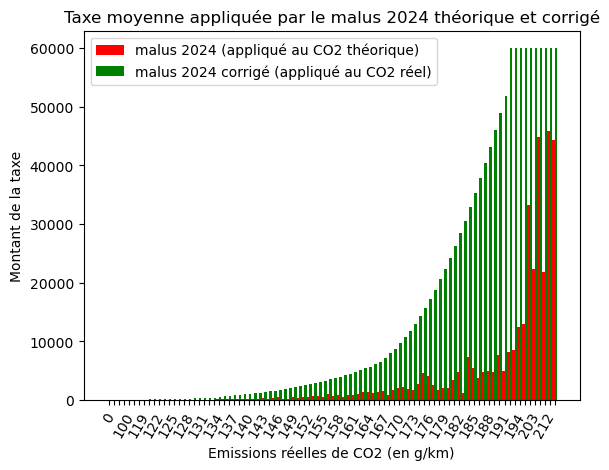

In [606]:

# tracé de l'histogramme avec deux barres pour chaque catégorie
fig, ax =plt.subplots()

bar_width= 0.5
index=np.arange(nb_categories)

print("index:", index.size)
print("malus_2024.reel.size", malus_2024_reel.size)
print("part_de_marche_avec_malus_etat_corr", part_de_marche_avec_malus_etat_corr.size)

bar1=ax.bar(index, malus_2024_theorique, bar_width, label='malus 2024 (appliqué au CO2 théorique)', color='red')
bar2=ax.bar([i + bar_width for i in index], malus_2024_reel, bar_width, label='malus 2024 corrigé (appliqué au CO2 réel)', color='green')

def set_None(liste):
    for i in range(1, len(liste), 2):
        liste[i] = None
    return(liste)

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Ajout de légendes, titres, et labels
ax.set_xlabel('Emissions réelles de CO2 (en g/km)')
ax.set_ylabel('Montant de la taxe')
ax.set_title("Taxe moyenne appliquée par le malus 2024 théorique et corrigé")
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(valeur_entiere_liste(l[:-1]), rotation =60)
ax.legend()

# Affichage de l'histogramme
plt.show()
#plt.legend()

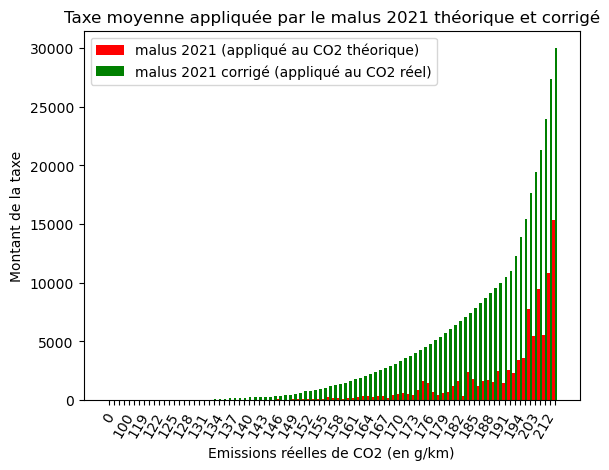

In [607]:

# tracé de l'histogramme avec deux barres pour chaque catégorie
fig, ax =plt.subplots()

bar_width= 0.5
index=np.arange(nb_categories)

bar1=ax.bar(index, malus_2021_theorique, bar_width, label='malus 2021 (appliqué au CO2 théorique)', color='red')
bar2=ax.bar([i + bar_width for i in index], malus_2021_reel, bar_width, label='malus 2021 corrigé (appliqué au CO2 réel)', color='green')

def set_None(liste):
    for i in range(1, len(liste), 2):
        liste[i] = None
    return(liste)

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Ajout de légendes, titres, et labels
ax.set_xlabel('Emissions réelles de CO2 (en g/km)')
ax.set_ylabel('Montant de la taxe')
ax.set_title("Taxe moyenne appliquée par le malus 2021 théorique et corrigé")
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(valeur_entiere_liste(l[:-1]), rotation =60)
ax.legend()

# Affichage de l'histogramme
plt.show()
#plt.legend()

## PARTIE 5: creation du malus optimisé

In [608]:
#delta = beta*(p2024.iloc[len(p2024)-1]-p2024) + np.log(quantite/(quantite.iloc[len(p)-1]))

def part_de_marche(m):
    pexp = np.exp(  delta + beta * (p + m))
    pit = pexp / np.sum(pexp)
    return pit

def utility_function_3(m):
    pexp = np.exp(delta+beta*(p+m))
    return(-np.sum(pexp))

def utility_function_4(m):
    pexp = np.exp(delta+beta*(p+0.5*(m+malus_2024_reel)))
    return(-np.sum(pexp))

# Fonction de contrainte  = moyenne des emissions réelles sur chacune des categories
def constraint_function(m):
    pexp = np.exp(delta+beta*(p+m))
    pit = pexp/np.sum(pexp)
    return(np.sum(pit*CO2reel))


In [609]:
def ineq(l, i):
    return(l[i+1]-l[i])

In [610]:
constraint = {'type': 'ineq', 'fun': lambda m : seuil - constraint_function(m)}
contraintes = [constraint]

#for i in range(30):
#    c={'type': 'ineq', 'fun': lambda l : ineq(l,)}
#    contraintes.append(c)

contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,0)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,1)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,2)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,3)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,4)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,5)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,6)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,7)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,8)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,9)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,10)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,11)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,12)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,13)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,14)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,15)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,16)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,17)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,18)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,19)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,20)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,21)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,22)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,23)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,24)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,25)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,26)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,27)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,28)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,29)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,30)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,31)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,32)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,33)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,34)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,35)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,36)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,37)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,38)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,39)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,40)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,41)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,42)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,43)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,44)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,45)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,46)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,47)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,48)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,49)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,50)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,51)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,52)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,53)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,54)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,55)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,56)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,57)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,58)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,59)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,60)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,61)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,62)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,63)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,64)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,65)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,66)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,67)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,68)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,69)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,70)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,71)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,72)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,73)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,74)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,75)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,76)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 77)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 78)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 79)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 80)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 81)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 82)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 83)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 84)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 85)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 86)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 87)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 88)})

In [612]:
def ineq_convex(l,i):
    return(l[i+2]- 2* l[i+1]+ l[i])
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq_convex(l,76)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 77)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 78)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 79)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 80)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 81)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 82)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 83)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 84)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 85)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 86)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 87)})

In [613]:
#le seuil a pas depasser
seuil = 130

In [655]:
bounds = [(0, None)] * (nb_categories-1)
bounds.append((0, 120000))
constraint = {'type': 'ineq', 'fun': lambda m : seuil - constraint_function(m)}
result = minimize(utility_function_3, m_guess, constraints=[constraint], bounds=bounds)

print(result.x) # valeur des malus obtenus pour atteindre l'optimum
#print(sum(result.x)*45478)
print(result.fun) #valeur de la fonction minimisée à l'optimum. 

[0.00000000e+00 9.71742817e-16 9.65117383e-17 0.00000000e+00
 8.21778890e-02 0.00000000e+00 8.15621283e+00 6.10361719e-03
 4.43017616e+00 1.31876038e+01 0.00000000e+00 1.73592668e+01
 3.35340154e+01 1.33636411e+01 4.76476243e+01 2.37939471e+01
 4.00342778e+01 1.74622012e+01 5.48946581e+02 4.32780836e+01
 6.84457544e+02 5.97618859e+01 1.20102147e+03 4.44385354e+03
 1.07708102e+03 3.29297228e+03 3.25381908e+03 3.03803975e+03
 6.48828711e+03 3.04502394e+03 3.12319122e+03 3.90134025e+03
 1.08749374e+04 1.25709829e+04 9.73472054e+03 6.07892033e+03
 4.79711443e+03 8.90574866e+03 8.48299420e+03 1.09865200e+04
 8.86206199e+03 9.25481000e+03 7.20390458e+03 1.21413890e+04
 8.84837894e+03 5.47219459e+03 1.45015097e+04 1.74113963e+04
 8.78836603e+03 7.13035058e+03 1.96517737e+04 1.64555564e+04
 1.88458972e+04 1.40953626e+04 7.55303478e+03 9.98015116e+03
 9.24789892e+03 8.74474963e+03 7.12350976e+03 6.69398334e+03
 7.55296309e+03 1.32594796e+04 1.28299532e+04 7.55303478e+03
 7.97572181e+03 5.864939

In [656]:
print(constraint_function(result.x))

129.99987844893926


In [657]:
print(len(bins_limits))
print(p.size)
print(bins_limits)

91
90
[  0  60  90 100 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 197 200 203 206 209 212 215 218
 420]


## 5. Visualisation du malus optimisé

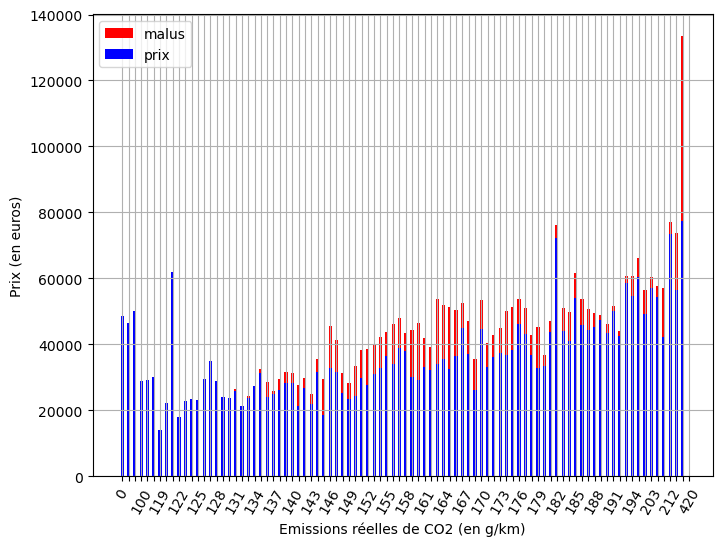

In [659]:
# Créer le graphe
plt.figure(figsize=(8, 6))

# Tracer les barres

plt.bar(range(len(p)), p+result.x, width=0.5, align='center', color='red', label='malus')
plt.bar(range(len(p)), p, width=0.5, align='center', color='blue', label='prix')

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Définir les limites des axes x et y
plt.xticks(range(len(bins_limits)), valeur_entiere_liste(bins_limits), rotation =60)
plt.xlabel('Emissions réelles de CO2 (en g/km)')
plt.ylabel('Prix (en euros)')

# Ajouter des titres et des légendes
plt.legend()
plt.grid(True)

# Afficher le graphe
plt.show()

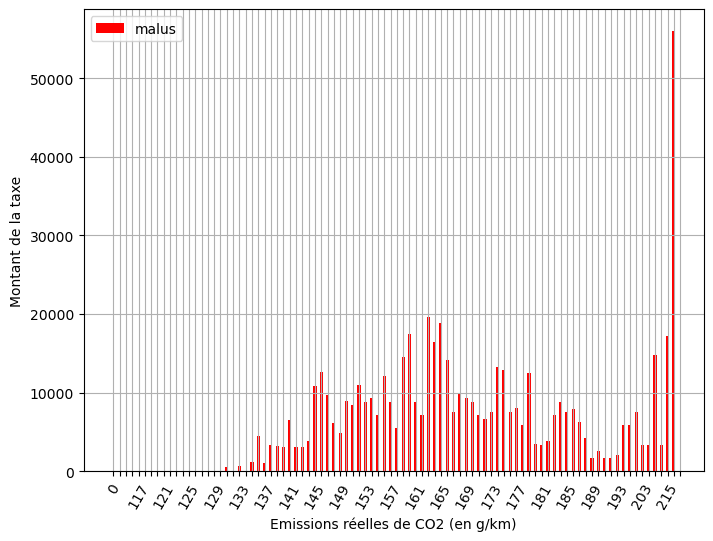

In [660]:
# Créer le graphe
plt.figure(figsize=(8, 6))

# Tracer les barres

plt.bar(range(len(p)), result.x, width=0.5, align='center', color='red', label='malus')

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%4==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Définir les limites des axes x et y
plt.xticks(range(len(bins_limits)), valeur_entiere_liste(bins_limits), rotation =60)
plt.xlabel('Emissions réelles de CO2 (en g/km)')
plt.ylabel('Montant de la taxe')

# Ajouter des titres et des légendes
plt.legend()
plt.grid(True)

# Afficher le graphe
plt.show()

In [648]:
m = result.x

In [649]:
print(malus_2021_reel)

CO2bins
[0, 60)           0.000000
[60, 90)          0.000000
[90, 100)         0.000000
[100, 117)        0.000000
[117, 118)        0.000000
                  ...     
[206, 209)    19423.066406
[209, 212)    21296.884235
[212, 215)    23909.678404
[215, 218)    27314.558761
[218, 420)    29974.365626
Length: 90, dtype: float64


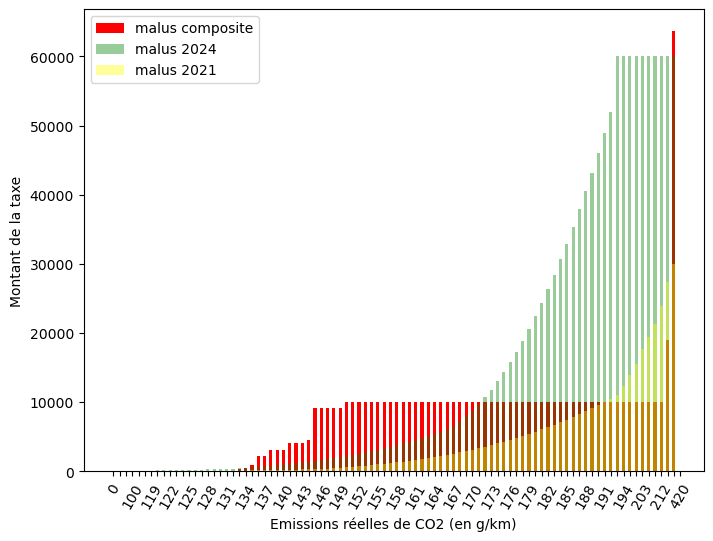

In [650]:
# Créer le graphe
plt.figure(figsize=(8, 6))

# Tracer les barres

plt.bar(range(len(p)), result.x, width=0.5, align='center', color='red', label='malus composite', alpha=1)
plt.bar(range(len(p)), malus_2024_reel, width=0.5, align='center', color='green', label='malus 2024',alpha=0.4)
plt.bar(range(len(p)), malus_2021_reel, width=0.5, align='center', color='yellow', label='malus 2021',alpha=0.4)

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Définir les limites des axes x et y
plt.xticks(range(len(bins_limits)), valeur_entiere_liste(bins_limits), rotation =60)
plt.xlabel('Emissions réelles de CO2 (en g/km)')
plt.ylabel('Montant de la taxe')

# Ajouter des titres et des légendes
plt.legend()
#plt.grid(True)

# Afficher le graphe
plt.show()

## 6. Variation des parts des marchés suite à l'application du malus

In [651]:
delta = beta*(p2021.iloc[len(p2021)-1]-p2021) + np.log(quantite/(quantite.iloc[len(p)-1]))
def part_de_marche(m):
    pexp = np.exp(  delta + beta * (p + m))
    pit = pexp / np.sum(pexp)
    return pit


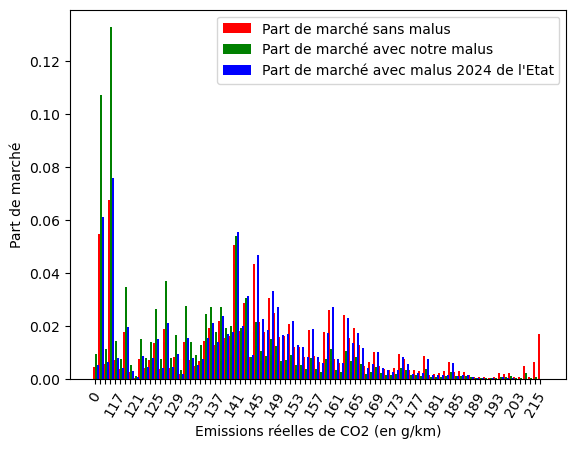

In [661]:
# part de marche en fonction du malus
part_de_marche_avec_malus = part_de_marche(m) #renvoit ventes de chaque categorie de CO2
part_de_marche_sans_malus = part_de_marche(m_guess) #renvoit ventes de chaque categorie de CO2 sans malus
part_de_marche_2024 = part_de_marche(malus_2024_theorique) #renvoit ventes ajustées avec le malus 2024

# tracé de l'histogramme avec deux barres pour chaque catégorie
fig, ax =plt.subplots()

bar_width= 0.4
index=range(nb_categories)

bar1=ax.bar(index, part_de_marche_sans_malus, bar_width, label='Part de marché sans malus', color='red')
bar2=ax.bar([i + bar_width  for i in index], part_de_marche_avec_malus, bar_width, label='Part de marché avec notre malus', color='green')
bar3=ax.bar([i + 2*bar_width for i in index], part_de_marche_2024, bar_width, label='Part de marché avec malus 2024 de l\'Etat', color='blue', alpha=1)

# Ajout de légendes, titres, et labels
ax.set_xlabel('Emissions réelles de CO2 (en g/km)')
ax.set_ylabel('Part de marché')
#ax.set_title('Histogramme des varitions de part de marché suite à l\'application du malus')
ax.set_xticks([i + bar_width / 2 for i in index]) # 
ax.set_xticklabels(valeur_entiere_liste(l[:-1]), rotation =60)
ax.legend()

# Affichage de l'histogramme
plt.show()

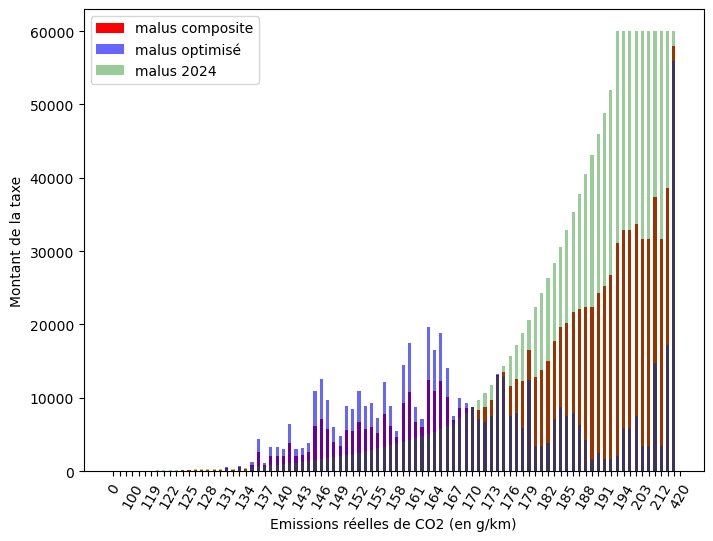

In [666]:
# Créer le graphe
plt.figure(figsize=(8, 6))

# Tracer les barres
plt.bar(range(len(p)), 0.5*(result.x+malus_2024_reel), width=0.5, align='center', color='red', label='malus composite', alpha=1)
plt.bar(range(len(p)), result.x, width=0.5, align='center', color='blue', label='malus optimisé', alpha=0.6)
plt.bar(range(len(p)), malus_2024_reel, width=0.5, align='center', color='green', label='malus 2024',alpha=0.4)
#plt.bar(range(len(p)), malus_2021_reel, width=0.5, align='center', color='yellow', label='malus 2021',alpha=0.4)

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Définir les limites des axes x et y
plt.xticks(range(len(bins_limits)), valeur_entiere_liste(bins_limits), rotation =60)
plt.xlabel('Emissions réelles de CO2 (en g/km)')
plt.ylabel('Montant de la taxe')

# Ajouter des titres et des légendes
plt.legend()
#plt.grid(True)

# Afficher le graphe
plt.show()

In [654]:
malus_composite = 0.5*(malus_2024_reel+result.x)

constraint_function(malus_composite)

131.5777906616499

## 6. Comparaison des moyennes de co2 (part de marché estimé/observé, CO2 réel/théorique) et impact des malus sur les emissions de CO2

i- moyenne co2 théorique (pondérée par parts de marché observées)

ii- moyenne co2 théorique (pondérée par parts de marché contrefactuelles sans malus)

iii- baisse en pourcent permis grâce au malus en CO2 théorique ((observé-contrefactuel)/contrefactuel)

iv- moyenne co2 réel (pondérée par parts de marché observées)

v- moyenne co2 réel (pondérée par parts de marché contrefactuelles sans malus)

vi- baisse en pourcent permis grâce au malus en CO2 réel ((observée-contrefactuel)/contrefactuel)

In [ ]:
def utility_function_3(m):
    pexp = np.exp(delta+beta*(p+m))
    return(-np.sum(pexp))

# Fonction de contrainte  = moyenne des emissions réelles sur chacune des categories
def constraint_function(m):
    pexp = np.exp(delta+beta*(p+m))
    pit = pexp/np.sum(pexp)
    return(np.sum(pit*CO2reel))

## Pour malus 2021

In [ ]:
print("MALUS 2021")
print("\nCO2 théorique")
# pour 2021 dans datap
nb_vehicules = datap['VOLUME'].sum()

# i- moyenne co2 théorique (pondérée par parts de marché observées)
observe = (datap['mean_co2_theorique']*datap['VOLUME']).sum() / nb_vehicules 
print('Moyenne co2 théorique (observée): ', observe )


# ii- moyenne co2 théorique (pondérée par parts de marché contrefactuelles sans malus)
estimation_sans_malus = ( CO2theorique * part_de_marche(m_guess)).sum()
estimation_avec_malus2021 = ( CO2theorique * part_de_marche(malus_2021)).sum()
print('Moyenne co2 théorique (estimée sans malus): ',  estimation_sans_malus)
print('Moyenne co2 théorique (estimée avec malus 2021): ',  estimation_avec_malus2021)

# iii- baisse en pourcent permis grâce au malus en CO2 théorique ((observé-contrefactuel)/contrefactuel)
print('Baisse en pourcentage des emissions grace au malus en co2 théorique: ', ((estimation_sans_malus - estimation_avec_malus2021)/estimation_avec_malus2021)*100)



MALUS 2021

CO2 théorique
Moyenne co2 théorique (observée):  119.14878070141394
Moyenne co2 théorique (estimée sans malus):  121.78524356245109
Moyenne co2 théorique (estimée avec malus 2021):  129.5223767286784
Baisse en pourcentage des emissions grace au malus en co2 théorique:  -5.973588009765261


In [ ]:
# pour 2021 dans datap
print("\nCO2 réel")
nb_vehicules = datap['VOLUME'].sum()

# iv- moyenne co2 réel (pondérée par parts de marché observées)
observe = (datap['mean_co2_reel']*datap['VOLUME']).sum() / nb_vehicules 
print('Moyenne co2 réel (observée): ', observe )

# comparaison realite / estimation
estimation_sans_malus = ( CO2reel * part_de_marche(m_guess)).sum()
print('Moyenne co2 réel (estimée sans malus): ',  estimation_sans_malus)

# v- moyenne co2 réel (pondérée par parts de marché contrefactuelles sans malus)
estimation_avec_malus2021 = ( CO2reel * part_de_marche(malus_2021)).sum()
print('Moyenne co2 réel (estimée avec malus 2021): ',  estimation_avec_malus2021)

# vi- baisse en pourcent permis grâce au malus en CO2 réel ((observée-contrefactuel)/contrefactuel)
print('Baisse en pourcentage des emissions grace au malus en co2 réel: ', ((estimation_sans_malus - estimation_avec_malus2021)/estimation_avec_malus2021)*100)


CO2 réel
Moyenne co2 réel (observée):  141.41995121496478
Moyenne co2 réel (estimée sans malus):  144.04332780651887
Moyenne co2 réel (estimée avec malus 2021):  149.2354725684125
Baisse en pourcentage des emissions grace au malus en co2 réel:  -3.479162609622477


## Pour malus 2024

In [ ]:
print("\n\n\n MALUS 2024")
print("\nCO2 théorique")

# pour 2021 dans datap
nb_vehicules = datap['VOLUME'].sum()

# i- moyenne co2 théorique (pondérée par parts de marché observées)
observe = (datap['mean_co2_theorique']*datap['VOLUME']).sum() / nb_vehicules 
print('Moyenne co2 théorique (observée): ', observe )


# ii- moyenne co2 théorique (pondérée par parts de marché contrefactuelles sans malus)
estimation_sans_malus = ( CO2theorique * part_de_marche(m_guess)).sum()
estimation_avec_malus2024 = ( CO2theorique * part_de_marche(malus_2024_theorique)).sum()
print('Moyenne co2 théorique (estimée sans malus): ',  estimation_sans_malus)
print('Moyenne co2 théorique (estimée avec malus 2024): ',  estimation_avec_malus2024)

# iii- baisse en pourcent permis grâce au malus en CO2 théorique ((observé-contrefactuel)/contrefactuel)
print('Baisse en pourcentage des emissions grace au malus en co2 théorique: ', ((estimation_sans_malus - estimation_avec_malus2024)/estimation_avec_malus2024)*100)




 MALUS 2024

CO2 théorique
Moyenne co2 théorique (observée):  119.14878070141394
Moyenne co2 théorique (estimée sans malus):  121.78524356245109
Moyenne co2 théorique (estimée avec malus 2024):  117.40670626611914
Baisse en pourcentage des emissions grace au malus en co2 théorique:  3.729375804485443


In [ ]:
print("\nCO2 réel")
# pour 2021 dans datap
nb_vehicules = datap['VOLUME'].sum()

# iv- moyenne co2 réel (pondérée par parts de marché observées)
observe = (datap['mean_co2_reel']*datap['VOLUME']).sum() / nb_vehicules 
print('Moyenne co2 réel (observée): ', observe )

# comparaison realite / estimation
estimation_sans_malus = ( CO2reel * part_de_marche(m_guess)).sum()
print('Moyenne co2 réel (estimée sans malus): ',  estimation_sans_malus)

# v- moyenne co2 réel (pondérée par parts de marché contrefactuelles sans malus)
estimation_avec_malus2024 = ( CO2reel * part_de_marche(malus_2024_theorique)).sum()
print('Moyenne co2 réel (estimée avec malus 2024): ',  estimation_avec_malus2024)

# vi- baisse en pourcent permis grâce au malus en CO2 réel ((observée-contrefactuel)/contrefactuel)
print('Baisse en pourcentage des emissions grace au malus en co2 réel: ', ((estimation_sans_malus - estimation_avec_malus2024)/estimation_avec_malus2024)*100)


CO2 réel
Moyenne co2 réel (observée):  141.41995121496478
Moyenne co2 réel (estimée sans malus):  144.04332780651887
Moyenne co2 réel (estimée avec malus 2024):  139.41043443821752
Baisse en pourcentage des emissions grace au malus en co2 réel:  3.323204168303852


## Pour notre malus

In [ ]:
print("\n\n\n NOTRE MALUS")
print("\nCO2 theorique")
# pour 2021 dans datap
nb_vehicules = datap['VOLUME'].sum()

# i- moyenne co2 théorique (pondérée par parts de marché observées)
observe = (datap['mean_co2_theorique']*datap['VOLUME']).sum() / nb_vehicules 
print('Moyenne co2 théorique (observée): ', observe )


# ii- moyenne co2 théorique (pondérée par parts de marché contrefactuelles sans malus)
estimation_sans_malus = ( CO2theorique * part_de_marche(m_guess)).sum()
estimation_avec_notre_malus = ( CO2theorique * part_de_marche(m)).sum()
print('Moyenne co2 théorique (estimée sans malus): ',  estimation_sans_malus)
print('Moyenne co2 théorique (estimée avec notre malus): ',  estimation_avec_notre_malus)

# iii- baisse en pourcent permis grâce au malus en CO2 théorique ((observé-contrefactuel)/contrefactuel)
print('Baisse en pourcentage des emissions grace au malus en co2 théorique: ', ((estimation_sans_malus - estimation_avec_notre_malus)/estimation_avec_notre_malus)*100)




 NOTRE MALUS

CO2 theorique
Moyenne co2 théorique (observée):  119.14878070141394
Moyenne co2 théorique (estimée sans malus):  121.78524356245109
Moyenne co2 théorique (estimée avec notre malus):  106.00999277590532
Baisse en pourcentage des emissions grace au malus en co2 théorique:  14.880909217580172


In [ ]:
print("\nCO2 réel")
# pour 2021 dans datap
nb_vehicules = datap['VOLUME'].sum()

# iv- moyenne co2 réel (pondérée par parts de marché observées)
observe = (datap['mean_co2_reel']*datap['VOLUME']).sum() / nb_vehicules 
print('Moyenne co2 réel (observée): ', observe )

# comparaison realite / estimation
estimation_sans_malus = ( CO2reel * part_de_marche(m_guess)).sum()
print('Moyenne co2 réel (estimée sans malus): ',  estimation_sans_malus)

# v- moyenne co2 réel (pondérée par parts de marché contrefactuelles sans malus)
estimation_avec_notre_malus = ( CO2reel * part_de_marche(m)).sum()
print('Moyenne co2 réel (estimée avec notre malus): ',  estimation_avec_malus2024)

# vi- baisse en pourcent permis grâce au malus en CO2 réel ((observée-contrefactuel)/contrefactuel)
print('Baisse en pourcentage des emissions grace au malus en co2 réel: ', ((estimation_sans_malus - estimation_avec_malus2024)/estimation_avec_malus2024)*100)


CO2 réel
Moyenne co2 réel (observée):  141.41995121496478
Moyenne co2 réel (estimée sans malus):  144.04332780651887
Moyenne co2 réel (estimée avec notre malus):  139.41043443821752
Baisse en pourcentage des emissions grace au malus en co2 réel:  3.323204168303852


# Optimisation

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']
       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
4                 NaN            0.000000       NaN         385.000000   
5                 NaN            0.000000       NaN         470.000000   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.

/tmp/ipykernel_85/1175417484.py:25: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))


RMSE_model = 9.353
R2_score_model = 0.894


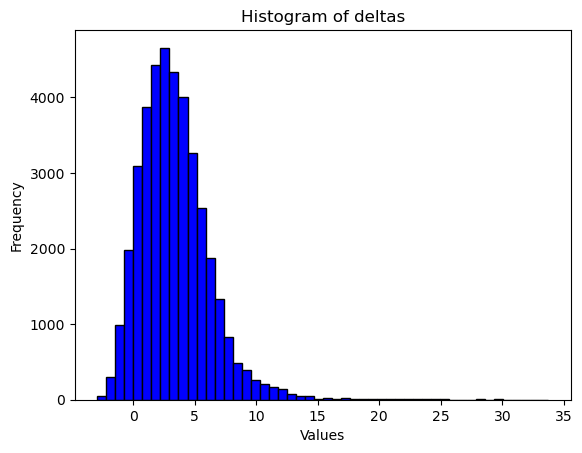

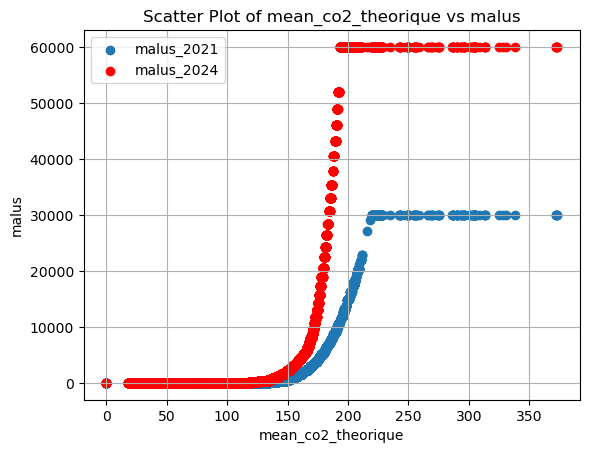

698.8260891552252
187.87181296990966
['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']
       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
4                 NaN            0.000000       NaN         385.000000   
5                 NaN            0.000000       NaN         470.000000   
...               ...                 ...       ...                ...   
54158        

/tmp/ipykernel_85/1175417484.py:25: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataToNormalize.loc[:,col]=scaler.fit_transform(dataToNormalize.loc[:,col].values.reshape(-1,1))


RMSE_model = 9.23
R2_score_model = 0.903


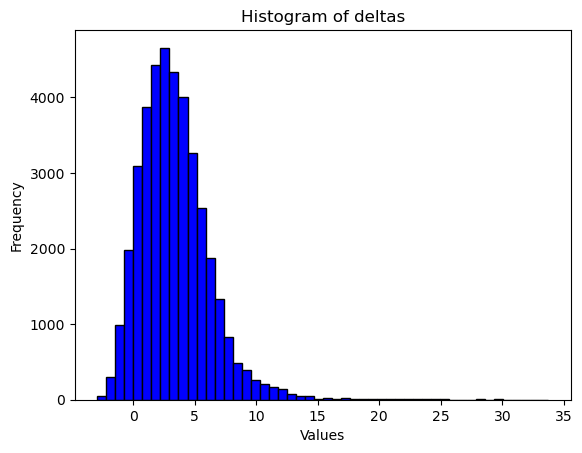

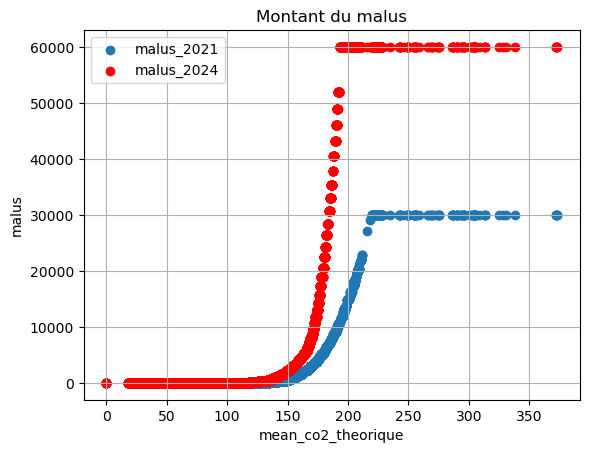

698.8260891552252
187.87181296990966


In [ ]:
# On fait tourner le fichier de categorisation avant (le -i et -e permet d'importer les variables sans afficher tous les print/plot etc...)
#%run -i -e ./categorisation_vehicules_eva_(3).ipynb --no output
#%run -i -e ./categorisation_du_malus2021.ipynb --no output
#%run -i -e ./impact_malus_sur_emissions_AM_reduced.ipynb --no output
%run -i -e ./categorisation24plus.ipynb --no output


In [ ]:
print("taille p:",p.size)
print("taille CO2reel:",CO2reel.size)
print("taille CO2theorique:",CO2theorique.size)

taille p: 90
taille CO2reel: 90
taille CO2theorique: 90


In [ ]:
p.dropna(inplace=True)
CO2reel.dropna(inplace=True)
CO2theorique.dropna(inplace=True)

## 1. Explication du modele

Soit m $\in \mathbb{R^n}$ le malus appliqué pour chacune des n catégories.

Soit p $\in \mathbb{R^n}$ le prix moyen des véhicules de chacune des n catégories.

Soit $ \beta $ le coefficient de prix (??)

Dans le modèle logit, la part de marché d'un modèle i de prix est donnée par:
$ \frac{e^{\beta * p_{i}} }{ \sum_{k=1}^{n} e^{\beta * p_{k}}}$

Après malus, la nouvelle part de marché du modèle i est donc : 
$ \frac{e^{\beta * (p_{i}+m_{i})} }{ \sum_{k=1}^{n} e^{\beta * (p_{k}+m_{k})}}$

La fonction d'utilité choisie est : 

utilite(m)= $ \sum_{k=1}^{n} \frac{m_k}{p_k}$ * ( nouvelle part du marche du modele k) 

In [ ]:
from scipy.optimize import minimize

La fonction de contrainte du malus vise à ce que les émissions moyennes de CO2 soient en dessous d'un certain seuil et est donc donnée par :

$\sum_{k=1}^{n}$ parts du marché du véhicule k x CO2 réel emis par le modele k

In [ ]:
p #moyenne des prix par catégorie

CO2bins
[0, 60)       48424.338402
[60, 90)      46524.975766
[90, 100)     50136.850764
[100, 117)    28936.667429
[117, 118)    29230.459290
                  ...     
[206, 209)    54331.880859
[209, 212)    42323.159395
[212, 215)    73564.338028
[215, 218)    56419.785791
[218, 420)    77440.391569
Length: 90, dtype: float64

In [ ]:
CO2reel

CO2bins
[0, 60)        60.003545
[60, 90)       83.084945
[90, 100)      93.743302
[100, 117)    112.571502
[117, 118)    123.433062
                 ...    
[206, 209)    201.679902
[209, 212)    202.783704
[212, 215)    210.791846
[215, 218)    200.433609
[218, 420)    247.354057
Length: 90, dtype: float64

In [ ]:
print("taille p:",p.size)
print("taille CO2reel:",CO2reel.size)
print("taille CO2theorique:",CO2theorique.size)

taille p: 90
taille CO2reel: 90
taille CO2theorique: 90


In [ ]:
CO2theorique

CO2bins
[0, 60)        18.598868
[60, 90)       31.338861
[90, 100)      41.441152
[100, 117)     88.334203
[117, 118)    107.688594
                 ...    
[206, 209)    177.376638
[209, 212)    189.730219
[212, 215)    179.447988
[215, 218)    176.753360
[218, 420)    210.097109
Length: 90, dtype: float64

In [ ]:
valeur_entiere_liste=np.vectorize(int)

## PARTIE 4

## 2. ON CODE LES MALUS

In [ ]:
malus_2021_df = pd.read_excel('malus_2021.xlsx')

# https://www.service-public.fr/particuliers/vosdroits/F35947

malus_2021_df.rename(columns={"Taux d'émission de CO2 par kilomètre": "CO2"}, inplace=True) # colonnes ['CO2', 'Montant']

def malus_etat_2021(c):
    if int(c)<=132:
        return 0
    if int(c)>=219:
        return 30000
    else:
        return int(malus_2021_df.loc[malus_2021_df['CO2'] == int(c),'Montant'])
    
malus_etat_2021_vf = np.vectorize(malus_etat_2021)

#ancien malus 2021 = malus_etat_2021_vf(CO2reel)

In [ ]:
malus_2024_df = pd.read_excel('malus_2024.xlsx')

# https://www.service-public.fr/particuliers/vosdroits/F35947

malus_2024_df.rename(columns={"Taux d'émission de CO2 par kilomètre": "CO2"}, inplace=True) # colonnes ['CO2', 'Montant']

def malus_etat_2024(c):
    if int(c)<=117:
        return 0
    if int(c)>=193:
        return 60000
    else:
        return int(malus_2024_df.loc[malus_2024_df['CO2'] == str(int(c))+ ' g','Montant'])
    
malus_etat_2024_vf = np.vectorize(malus_etat_2024)

In [ ]:
datap['malus_2021'] = datap['mean_co2_theorique'].apply(malus_etat_2021) + 0 # co2 theorique
datap['malus_2021']

0        30000
1          360
3            0
7            0
9            0
         ...  
54157        0
54158        0
54202        0
54203        0
54204        0
Name: malus_2021, Length: 39549, dtype: int64

In [ ]:
datap['malus_2024'] = datap['mean_co2_theorique'].apply(malus_etat_2024_vf) + 0 # co2 theorique
datap['malus_2024']

0        60000
1         1761
3            0
7            0
9            0
         ...  
54157      240
54158      240
54202      230
54203      230
54204      230
Name: malus_2024, Length: 39549, dtype: int64

In [ ]:
nb_par_bin = datap.groupby('CO2bins')['VOLUME'].sum()
datap['malus2021Volume']= datap['malus_2021']* datap['VOLUME']
malus_2021_theorique = (datap.groupby('CO2bins')['malus2021Volume'].sum()) / nb_par_bin
malus_2021_theorique.dropna(inplace=True) # malus 2021 theorique appliqué aux categorissation du malus 2024 réel

In [ ]:
datap['malus2021ReelVolume']= datap['malus_2021_reel']* datap['VOLUME']
malus_2021_reel = (datap.groupby('CO2bins')['malus2021ReelVolume'].sum()) / nb_par_bin
malus_2021_reel.dropna(inplace=True) # malus 2021 theorique appliqué aux categorissation du malus 2024 réel

In [ ]:
datap['malus2024Volume']= datap['malus_2024']* datap['VOLUME']
malus_2024_theorique = (datap.groupby('CO2bins')['malus2024Volume'].sum()) / nb_par_bin
malus_2024_theorique.dropna(inplace=True) # malus 2024 theorique appliqué aux categorissation du malus 2024 réel

In [ ]:
malus_2024_reel = datap.groupby('CO2bins')['malus_2024_reel'].min()
malus_2024_reel.dropna(inplace=True)

In [ ]:
malus_2021_theorique.dropna(inplace=True)
malus_2024_theorique.dropna(inplace=True)

In [ ]:
malus_2021_reel

CO2bins
[0, 60)           0.000000
[60, 90)          0.000000
[90, 100)         0.000000
[100, 117)        0.000000
[117, 118)        0.000000
                  ...     
[206, 209)    19423.066406
[209, 212)    21296.884235
[212, 215)    23909.678404
[215, 218)    27314.558761
[218, 420)    29974.365626
Length: 90, dtype: float64

In [ ]:
#malus_2021 = malus_etat_2021_vf(CO2reel)
#malus_2021_theorique= malus_etat_2021_vf(CO2theorique)

In [ ]:
#malus_2024 = malus_etat_2024_vf(CO2reel)
#malus_2024_theorique= malus_etat_2024_vf(CO2theorique)

In [ ]:
malus_2024_theorique

CO2bins
[0, 60)           0.000000
[60, 90)          0.000000
[90, 100)         0.000000
[100, 117)        0.000000
[117, 118)        0.000000
                  ...     
[206, 209)    22347.443359
[209, 212)    44880.061082
[212, 215)    21776.117371
[215, 218)    45923.521902
[218, 420)    44285.210377
Length: 90, dtype: float64

## 3. ON CALIBRE LE MODELE LOGIT

In [ ]:
# valeurs exemples de variables clés de l'optimisation
beta = -0.00015 # valeur d'Etienne : -0.01414

# vecteur prix par catégorie p

# vecteur CO2estimé par catégorie CO2reel

nb_categories = p.shape[0]
# le malus inital
m_guess = np.zeros(nb_categories)

In [ ]:
nb_categories

90

### ATTENTION ICI EST CALCULE LE DELTA

In [ ]:
# delta = beta*(p.iloc[len(p)-1]-p)

In [ ]:
p2021 = p + malus_2021_theorique # on a rajouté le malus 2021 car les ventes observées en 2021 subissent l'effet du malus

In [ ]:
p2024 = p + malus_2024_theorique

In [ ]:
quantite = datap.groupby('CO2bins')['VOLUME'].sum()
quantite = quantite[quantite > 0]
quantite

CO2bins
[0, 60)        6773
[60, 90)      77991
[90, 100)      8376
[100, 117)    96605
[117, 118)    10366
              ...  
[206, 209)      512
[209, 212)     1719
[212, 215)      426
[215, 218)     1872
[218, 420)     2467
Name: VOLUME, Length: 90, dtype: int64

In [ ]:
p

CO2bins
[0, 60)       48424.338402
[60, 90)      46524.975766
[90, 100)     50136.850764
[100, 117)    28936.667429
[117, 118)    29230.459290
                  ...     
[206, 209)    54331.880859
[209, 212)    42323.159395
[212, 215)    73564.338028
[215, 218)    56419.785791
[218, 420)    77440.391569
Length: 90, dtype: float64

In [ ]:
#delta = beta*(p['prix'].loc[c]-p['prix'])+np.log(p['Quantité']/(p['Quantité'].loc[c]))
#delta = beta*(p['prix'].iloc[len(p)-1]-p['prix'])+np.log(p['Quantité']/(p['Quantité'].loc[c]))
#delta = beta*(p2021.iloc[len(p2021)-1]-p2021) + np.log(quantite/(quantite.iloc[len(p)-1]))

In [ ]:
#delta = beta*(p2024.iloc[len(p2024)-1]-p2024) + np.log(quantite/(quantite.iloc[len(p)-1]))

In [ ]:
delta = beta*(p2021.iloc[len(p2021)-1]-p2021) + np.log(quantite/(quantite.iloc[len(p)-1]))

### FIN DU CALCUL DU DELTA

In [ ]:
def part_de_marche(m):
    pexp = np.exp(  delta + beta * (p + m))
    pit = pexp / np.sum(pexp)
    return pit

In [ ]:
malus_2021_theorique

CO2bins
[0, 60)           0.000000
[60, 90)          0.000000
[90, 100)         0.000000
[100, 117)        0.000000
[117, 118)        0.000000
                  ...     
[206, 209)     5425.035156
[209, 212)     9443.837696
[212, 215)     5565.115023
[215, 218)    10801.862714
[218, 420)    15317.247264
Length: 90, dtype: float64

In [ ]:
malus_2024_theorique

CO2bins
[0, 60)           0.000000
[60, 90)          0.000000
[90, 100)         0.000000
[100, 117)        0.000000
[117, 118)        0.000000
                  ...     
[206, 209)    22347.443359
[209, 212)    44880.061082
[212, 215)    21776.117371
[215, 218)    45923.521902
[218, 420)    44285.210377
Length: 90, dtype: float64

In [ ]:
pi = np.exp(delta+beta*p2024)/sum(np.exp(delta+beta*p2024))
pi

CO2bins
[0, 60)       0.005300
[60, 90)      0.061032
[90, 100)     0.006555
[100, 117)    0.075599
[117, 118)    0.008112
                ...   
[206, 209)    0.000032
[209, 212)    0.000007
[212, 215)    0.000029
[215, 218)    0.000008
[218, 420)    0.000025
Length: 90, dtype: float64

In [ ]:
delta

CO2bins
[0, 60)      -5.640054
[60, 90)     -3.481309
[90, 100)    -5.170751
[100, 117)   -5.905518
[117, 118)   -8.093549
                ...   
[206, 209)   -6.522542
[209, 212)   -6.509856
[212, 215)   -3.800547
[215, 218)   -4.106394
[218, 420)    0.000000
Length: 90, dtype: float64

In [ ]:
delta.mean()

-7.101691360635859

## 4. Variations de part de marché 2021, 2024, CO2 réel, CO2 théorique

In [ ]:
# Fonction d'utilité
def utility_function(m):
    pexp = np.exp(beta*(p+m))
    pit = pexp/np.sum(pexp)
    return(-np.sum(m*pit/p))

def utility_function_2(m):
    pexp = np.exp(delta+beta*(p+m))
    pit = pexp/np.sum(pexp)
    return(-np.sum(pexp*pit))

def utility_function_3(m):
    pexp = np.exp(delta+beta*(p+m))
    return(-np.sum(pexp))

# Fonction de contrainte  = moyenne des emissions réelles sur chacune des categories
def constraint_function(m):
    pexp = np.exp(delta+beta*(p+m))
    pit = pexp/np.sum(pexp)
    return(np.sum(pit*CO2reel))

print(m_guess.shape)
print(p.shape)
print(CO2reel.shape)
utility_function(m_guess)
#bins_limits

(90,)
(90,)
(90,)


-0.0

In [ ]:
constraint_function(malus_2021_reel) #b

138.290404892236

In [ ]:
constraint_function(malus_2021_theorique) #a

141.11142908185698

In [ ]:
constraint_function(malus_2024_reel)# le b : emissions reelles avec malus 2024 appliquées au CO2 reel

134.49169401880053

In [ ]:
constraint_function(malus_2024_theorique) # le a: emissions reelles avec malus 2024 appliquées au CO2 theorique

139.35277003825786

In [ ]:
constraint_function(m_guess)

143.99097906365742

In [ ]:
malus_2024_reel

CO2bins
[0, 60)           0
[60, 90)          0
[90, 100)         0
[100, 117)        0
[117, 118)        0
              ...  
[206, 209)    60000
[209, 212)    60000
[212, 215)    60000
[215, 218)    60000
[218, 420)    60000
Name: malus_2024_reel, Length: 90, dtype: int64

In [ ]:
nb_categories

90

In [ ]:
intervals = p.index
l=[]
# Parcourir les intervalles et afficher les limites
for interval in intervals:
    lower_limit, upper_limit = str(interval).strip('[]').split(', ')
    l.append(int(lower_limit))
l.append(int(upper_limit[:-1]))

In [ ]:
delta = beta*(p2021.iloc[len(p2021)-1]-p2021) + np.log(quantite/(quantite.iloc[len(p)-1]))
def part_de_marche(m):
    pexp = np.exp(  delta + beta * (p + m))
    pit = pexp / np.sum(pexp)
    return pit

index: 90
malus_2024.reel.size 90
part_de_marche_avec_malus_etat_corr 90


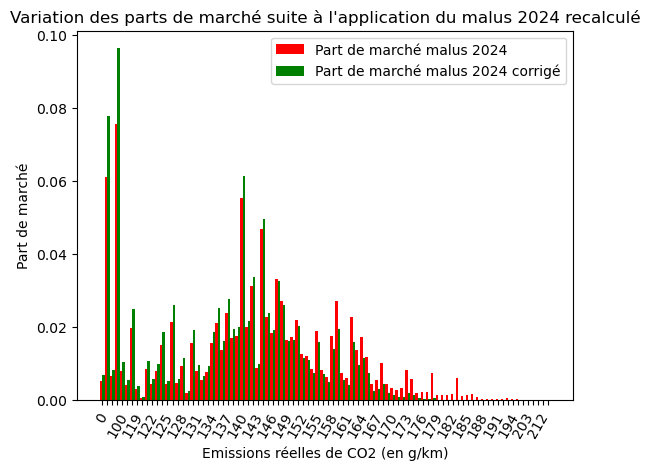

In [ ]:
# part de marche en fonction du malus
part_de_marche_avec_malus_etat = part_de_marche(malus_2024_theorique) #renvoit ventes de chaque categorie de CO2 avec le malus 2021 calculé à partir des émissions théoriques
part_de_marche_avec_malus_etat_corr = part_de_marche(malus_2024_reel) #renvoit ventes de chaque categorie de CO2 avec mallus 2021 et calcul des émissions rélles


# tracé de l'histogramme avec deux barres pour chaque catégorie
fig, ax =plt.subplots()

bar_width= 0.5
index=np.arange(nb_categories)

print("index:", index.size)
print("malus_2024.reel.size", malus_2024_reel.size)
print("part_de_marche_avec_malus_etat_corr", part_de_marche_avec_malus_etat_corr.size)

bar1=ax.bar(index, part_de_marche_avec_malus_etat, bar_width, label='Part de marché malus 2024', color='red')
bar2=ax.bar([i + bar_width for i in index], part_de_marche_avec_malus_etat_corr, bar_width, label='Part de marché malus 2024 corrigé', color='green')

def set_None(liste):
    for i in range(1, len(liste), 2):
        liste[i] = None
    return(liste)

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Ajout de légendes, titres, et labels
ax.set_xlabel('Emissions réelles de CO2 (en g/km)')
ax.set_ylabel('Part de marché')
ax.set_title("Variation des parts de marché suite à l'application du malus 2024 recalculé")
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(valeur_entiere_liste(l[:-1]), rotation =60)
ax.legend()

# Affichage de l'histogramme
plt.show()
#plt.legend()

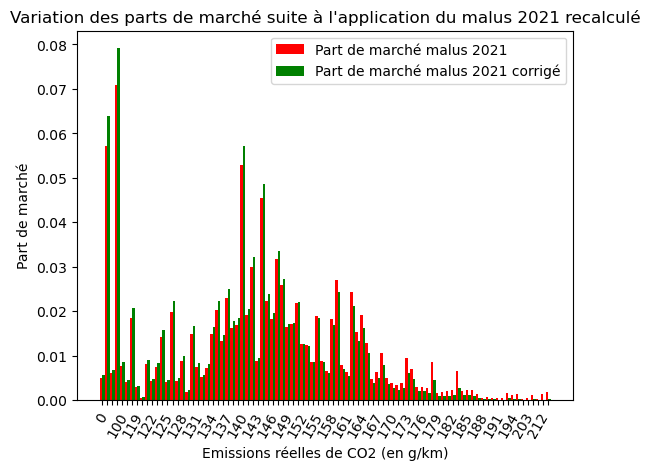

In [ ]:
# part de marche en fonction du malus
part_de_marche_avec_malus_etat = part_de_marche(malus_2021_theorique) #renvoit ventes de chaque categorie de CO2 avec le malus 2021 calculé à partir des émissions théoriques
part_de_marche_avec_malus_etat_corr = part_de_marche(malus_2021_reel) #renvoit ventes de chaque categorie de CO2 avec mallus 2021 et calcul des émissions rélles


# tracé de l'histogramme avec deux barres pour chaque catégorie
fig, ax =plt.subplots()

bar_width= 0.5
index=np.arange(nb_categories)

bar1=ax.bar(index, part_de_marche_avec_malus_etat, bar_width, label='Part de marché malus 2021', color='red')
bar2=ax.bar([i + bar_width for i in index], part_de_marche_avec_malus_etat_corr, bar_width, label='Part de marché malus 2021 corrigé', color='green')

def set_None(liste):
    for i in range(1, len(liste), 2):
        liste[i] = None
    return(liste)

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Ajout de légendes, titres, et labels
ax.set_xlabel('Emissions réelles de CO2 (en g/km)')
ax.set_ylabel('Part de marché')
ax.set_title("Variation des parts de marché suite à l'application du malus 2021 recalculé")
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(valeur_entiere_liste(l[:-1]), rotation =60)
ax.legend()

# Affichage de l'histogramme
plt.show()
#plt.legend()

index: 90
malus_2024.reel.size 90
part_de_marche_avec_malus_etat_corr 90


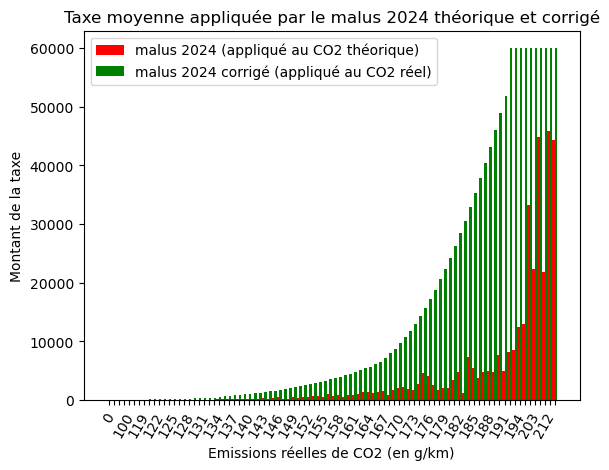

In [ ]:

# tracé de l'histogramme avec deux barres pour chaque catégorie
fig, ax =plt.subplots()

bar_width= 0.5
index=np.arange(nb_categories)

print("index:", index.size)
print("malus_2024.reel.size", malus_2024_reel.size)
print("part_de_marche_avec_malus_etat_corr", part_de_marche_avec_malus_etat_corr.size)

bar1=ax.bar(index, malus_2024_theorique, bar_width, label='malus 2024 (appliqué au CO2 théorique)', color='red')
bar2=ax.bar([i + bar_width for i in index], malus_2024_reel, bar_width, label='malus 2024 corrigé (appliqué au CO2 réel)', color='green')

def set_None(liste):
    for i in range(1, len(liste), 2):
        liste[i] = None
    return(liste)

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Ajout de légendes, titres, et labels
ax.set_xlabel('Emissions réelles de CO2 (en g/km)')
ax.set_ylabel('Montant de la taxe')
ax.set_title("Taxe moyenne appliquée par le malus 2024 théorique et corrigé")
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(valeur_entiere_liste(l[:-1]), rotation =60)
ax.legend()

# Affichage de l'histogramme
plt.show()
#plt.legend()

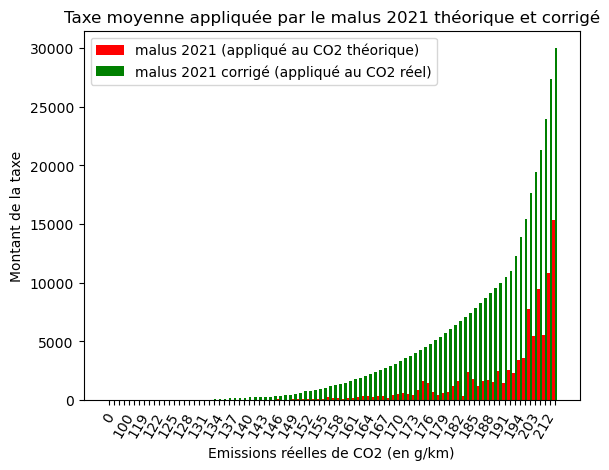

In [ ]:

# tracé de l'histogramme avec deux barres pour chaque catégorie
fig, ax =plt.subplots()

bar_width= 0.5
index=np.arange(nb_categories)

bar1=ax.bar(index, malus_2021_theorique, bar_width, label='malus 2021 (appliqué au CO2 théorique)', color='red')
bar2=ax.bar([i + bar_width for i in index], malus_2021_reel, bar_width, label='malus 2021 corrigé (appliqué au CO2 réel)', color='green')

def set_None(liste):
    for i in range(1, len(liste), 2):
        liste[i] = None
    return(liste)

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Ajout de légendes, titres, et labels
ax.set_xlabel('Emissions réelles de CO2 (en g/km)')
ax.set_ylabel('Montant de la taxe')
ax.set_title("Taxe moyenne appliquée par le malus 2021 théorique et corrigé")
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(valeur_entiere_liste(l[:-1]), rotation =60)
ax.legend()

# Affichage de l'histogramme
plt.show()
#plt.legend()

## PARTIE 5: creation du malus optimisé

In [ ]:
#delta = beta*(p2024.iloc[len(p2024)-1]-p2024) + np.log(quantite/(quantite.iloc[len(p)-1]))

def part_de_marche(m):
    pexp = np.exp(  delta + beta * (p + m))
    pit = pexp / np.sum(pexp)
    return pit

def utility_function_3(m):
    pexp = np.exp(delta+beta*(p+m))
    return(-np.sum(pexp))

def utility_function_4(m):
    pexp = np.exp(delta+beta*(p+0.5*(m+malus_2024_reel)))
    return(-np.sum(pexp))

# Fonction de contrainte  = moyenne des emissions réelles sur chacune des categories
def constraint_function(m):
    pexp = np.exp(delta+beta*(p+m))
    pit = pexp/np.sum(pexp)
    return(np.sum(pit*CO2reel))


In [ ]:
def ineq(l, i):
    return(l[i+1]-l[i])

In [ ]:
constraint = {'type': 'ineq', 'fun': lambda m : seuil - constraint_function(m)}
contraintes = [constraint]

#for i in range(30):
#    c={'type': 'ineq', 'fun': lambda l : ineq(l,)}
#    contraintes.append(c)

contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,0)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,1)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,2)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,3)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,4)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,5)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,6)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,7)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,8)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,9)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,10)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,11)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,12)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,13)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,14)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,15)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,16)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,17)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,18)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,19)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,20)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,21)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,22)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,23)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,24)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,25)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,26)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,27)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,28)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,29)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,30)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,31)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,32)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,33)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,34)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,35)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,36)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,37)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,38)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,39)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,40)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,41)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,42)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,43)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,44)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,45)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,46)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,47)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,48)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,49)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,50)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,51)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,52)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,53)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,54)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,55)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,56)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,57)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,58)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,59)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,60)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,61)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,62)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,63)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,64)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,65)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,66)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,67)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,68)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,69)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,70)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,71)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,72)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,73)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,74)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,75)})
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq(l,76)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 77)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 78)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 79)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 80)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 81)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 82)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 83)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 84)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 85)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 86)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 87)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq(l, 88)})

In [ ]:
## test convexite a la fin

def ineq_convex(l,i):
    return(l[i+2]- 2* l[i+1]+ l[i])
contraintes.append({'type': 'ineq', 'fun': lambda l : ineq_convex(l,76)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 77)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 78)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 79)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 80)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 81)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 82)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 83)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 84)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 85)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 86)})
contraintes.append({'type': 'ineq', 'fun': lambda l: ineq_convex(l, 87)})

In [ ]:
#le seuil a pas depasser
seuil = 130

In [ ]:
bounds = [(0, None)] * (nb_categories-1)
bounds.append((0, 120000))
constraint = {'type': 'ineq', 'fun': lambda m : seuil - constraint_function(m)}
result = minimize(utility_function_4, m_guess, constraints=contraintes, bounds=bounds)

print(result.x) # valeur des malus obtenus pour atteindre l'optimum
#print(sum(result.x)*45478)
print(result.fun) #valeur de la fonction minimisée à l'optimum. 

[0.00000000e+00 3.14653026e-13 2.70044969e-14 0.00000000e+00
 2.12351667e-14 8.06284964e-14 1.32089495e+00 1.32089495e+00
 1.32089495e+00 1.32089495e+00 2.38947176e+00 4.03444924e+00
 7.26327005e+00 7.26327005e+00 1.23744084e+01 1.23744084e+01
 1.23744084e+01 1.23744084e+01 2.55045770e+01 2.55045770e+01
 2.55045770e+01 2.55045770e+01 5.69930278e+02 2.22668319e+03
 2.22668319e+03 3.18102304e+03 3.18102304e+03 3.18102304e+03
 3.72493517e+03 3.72493517e+03 3.72493517e+03 5.28693255e+03
 9.54869103e+03 9.54869103e+03 9.54869103e+03 9.55049979e+03
 9.55276700e+03 9.83701573e+03 1.01160178e+04 1.01160178e+04
 1.01160178e+04 1.01160178e+04 1.01160178e+04 1.01160178e+04
 1.01160178e+04 1.01160178e+04 1.01160178e+04 1.01160178e+04
 1.01160178e+04 1.01160178e+04 1.01160178e+04 1.01160178e+04
 1.01160178e+04 1.01160178e+04 1.01160178e+04 1.01160178e+04
 1.01160178e+04 1.01160178e+04 1.01160178e+04 1.01160178e+04
 1.01160178e+04 1.01160178e+04 1.01160178e+04 1.01160178e+04
 1.01160178e+04 1.011601

In [ ]:
print(constraint_function(result.x))

129.99087980371223


In [ ]:
print(len(bins_limits))
print(p.size)
print(bins_limits)

91
90
[  0  60  90 100 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 197 200 203 206 209 212 215 218
 420]


## 5. Visualisation du malus optimisé

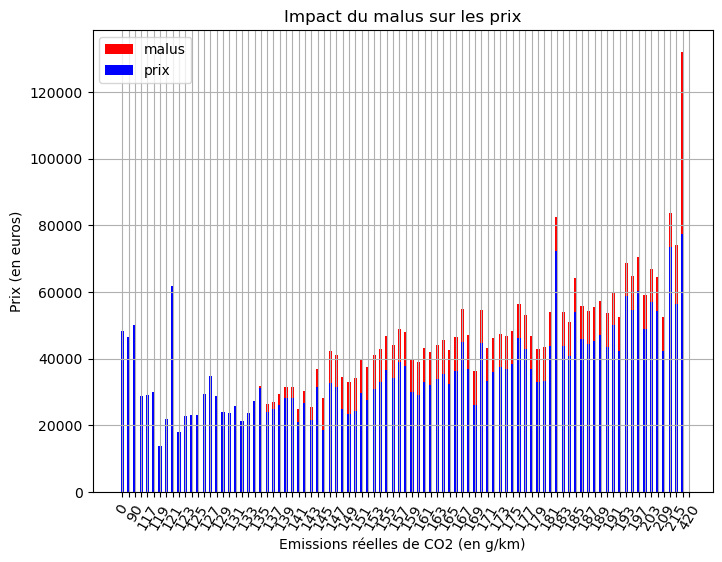

In [ ]:
# Créer le graphe
plt.figure(figsize=(8, 6))

# Tracer les barres

plt.bar(range(len(p)), p+result.x, width=0.5, align='center', color='red', label='malus')
plt.bar(range(len(p)), p, width=0.5, align='center', color='blue', label='prix')

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%2==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Définir les limites des axes x et y
plt.xticks(range(len(bins_limits)), valeur_entiere_liste(bins_limits), rotation =60)
plt.xlabel('Emissions réelles de CO2 (en g/km)')
plt.ylabel('Prix (en euros)')

# Ajouter des titres et des légendes
plt.title('Impact du malus sur les prix')
plt.legend()
plt.grid(True)

# Afficher le graphe
plt.show()

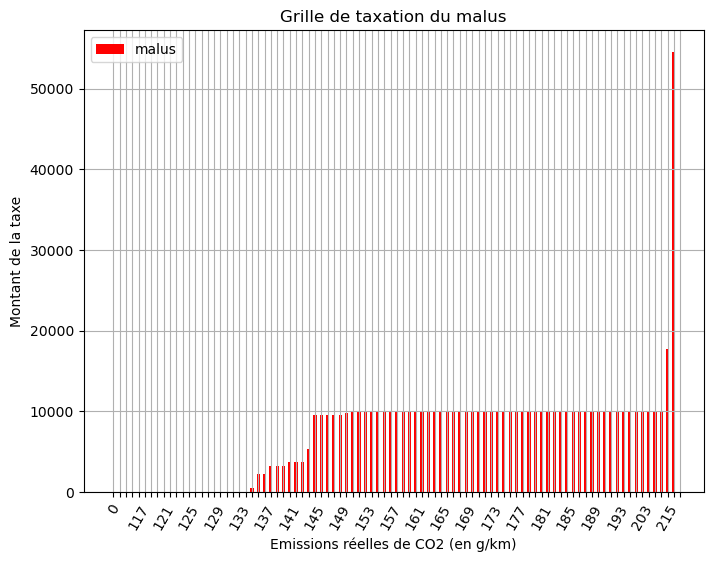

In [ ]:
# Créer le graphe
plt.figure(figsize=(8, 6))

# Tracer les barres

plt.bar(range(len(p)), result.x, width=0.5, align='center', color='red', label='malus')

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%4==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Définir les limites des axes x et y
plt.xticks(range(len(bins_limits)), valeur_entiere_liste(bins_limits), rotation =60)
plt.xlabel('Emissions réelles de CO2 (en g/km)')
plt.ylabel('Montant de la taxe')

# Ajouter des titres et des légendes
plt.title('Grille de taxation du malus')
plt.legend()
plt.grid(True)

# Afficher le graphe
plt.show()

In [ ]:
m = result.x

In [ ]:
print(malus_2021_reel)

CO2bins
[0, 60)           0.000000
[60, 90)          0.000000
[90, 100)         0.000000
[100, 117)        0.000000
[117, 118)        0.000000
                  ...     
[206, 209)    19423.066406
[209, 212)    21296.884235
[212, 215)    23909.678404
[215, 218)    27314.558761
[218, 420)    29974.365626
Length: 90, dtype: float64


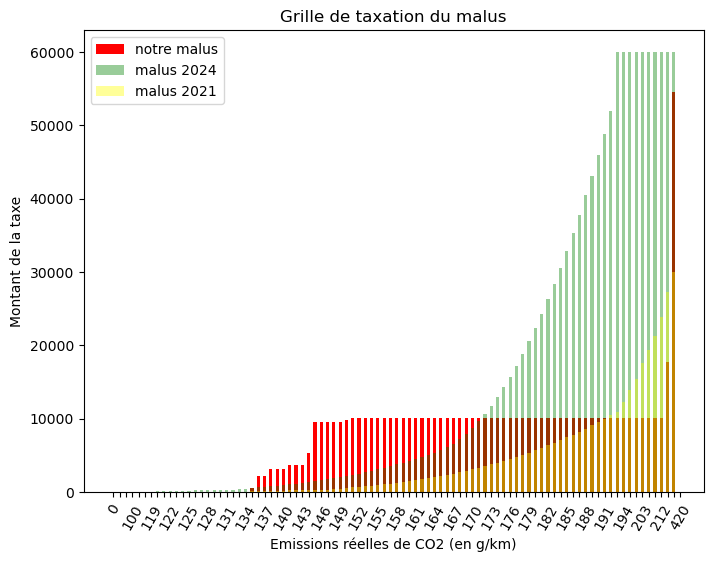

In [ ]:
# Créer le graphe
plt.figure(figsize=(8, 6))

# Tracer les barres

plt.bar(range(len(p)), result.x, width=0.5, align='center', color='red', label='notre malus', alpha=1)
plt.bar(range(len(p)), malus_2024_reel, width=0.5, align='center', color='green', label='malus 2024',alpha=0.4)
plt.bar(range(len(p)), malus_2021_reel, width=0.5, align='center', color='yellow', label='malus 2021',alpha=0.4)

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Définir les limites des axes x et y
plt.xticks(range(len(bins_limits)), valeur_entiere_liste(bins_limits), rotation =60)
plt.xlabel('Emissions réelles de CO2 (en g/km)')
plt.ylabel('Montant de la taxe')

# Ajouter des titres et des légendes
plt.title('Grille de taxation du malus')
plt.legend()
#plt.grid(True)

# Afficher le graphe
plt.show()

In [ ]:
print(p.index)

CategoricalIndex([   [0, 60),   [60, 90),  [90, 100), [100, 117), [117, 118),
                  [118, 119), [119, 120), [120, 121), [121, 122), [122, 123),
                  [123, 124), [124, 125), [125, 126), [126, 127), [127, 128),
                  [128, 129), [129, 130), [130, 131), [131, 132), [132, 133),
                  [133, 134), [134, 135), [135, 136), [136, 137), [137, 138),
                  [138, 139), [139, 140), [140, 141), [141, 142), [142, 143),
                  [143, 144), [144, 145), [145, 146), [146, 147), [147, 148),
                  [148, 149), [149, 150), [150, 151), [151, 152), [152, 153),
                  [153, 154), [154, 155), [155, 156), [156, 157), [157, 158),
                  [158, 159), [159, 160), [160, 161), [161, 162), [162, 163),
                  [163, 164), [164, 165), [165, 166), [166, 167), [167, 168),
                  [168, 169), [169, 170), [170, 171), [171, 172), [172, 173),
                  [173, 174), [174, 175), [175, 176), [176, 177)

## 6. Variation des parts des marchés suite à l'application du malus

In [ ]:
delta = beta*(p2021.iloc[len(p2021)-1]-p2021) + np.log(quantite/(quantite.iloc[len(p)-1]))
def part_de_marche(m):
    pexp = np.exp(  delta + beta * (p + m))
    pit = pexp / np.sum(pexp)
    return pit


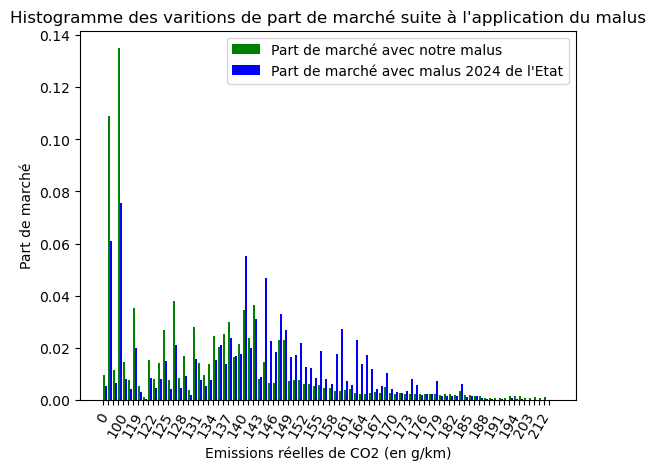

In [ ]:
# part de marche en fonction du malus
part_de_marche_avec_malus = part_de_marche(m) #renvoit ventes de chaque categorie de CO2
part_de_marche_sans_malus = part_de_marche(m_guess) #renvoit ventes de chaque categorie de CO2 sans malus
part_de_marche_2024 = part_de_marche(malus_2024_theorique) #renvoit ventes ajustées avec le malus 2024

# tracé de l'histogramme avec deux barres pour chaque catégorie
fig, ax =plt.subplots()

bar_width= 0.4
index=range(nb_categories)

#bar1=ax.bar(index, part_de_marche_sans_malus, bar_width, label='Part de marché sans malus', color='red')
bar2=ax.bar([i + bar_width  for i in index], part_de_marche_avec_malus, bar_width, label='Part de marché avec notre malus', color='green')
bar3=ax.bar([i + 2*bar_width for i in index], part_de_marche_2024, bar_width, label='Part de marché avec malus 2024 de l\'Etat', color='blue', alpha=1)

# Ajout de légendes, titres, et labels
ax.set_xlabel('Emissions réelles de CO2 (en g/km)')
ax.set_ylabel('Part de marché')
ax.set_title('Histogramme des varitions de part de marché suite à l\'application du malus')
ax.set_xticks([i + bar_width / 2 for i in index]) # 
ax.set_xticklabels(valeur_entiere_liste(l[:-1]), rotation =60)
ax.legend()

# Affichage de l'histogramme
plt.show()

Nouvelle proposition :

In [ ]:
result.x

array([0.00000000e+00, 0.00000000e+00, 6.14606282e-11, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.04106261e-12, 4.75231980e-12,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50873143e-12,
       0.00000000e+00, 1.98888957e-12, 2.95492223e-12, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.08537595e+02, 8.66845011e-13,
       4.26317219e-14, 0.00000000e+00, 9.96518865e+02, 4.28862939e+03,
       1.85478255e-13, 2.51266685e+03, 4.21229561e+03, 2.64969735e+03,
       7.15540193e+03, 2.77248141e+03, 3.00380305e+03, 4.88691260e+03,
       1.17930355e+04, 1.26403673e+04, 1.11230592e+04, 6.43294408e+03,
       5.05382661e+03, 9.60575104e+03, 9.60575104e+03, 1.12911334e+04,
       8.93229422e+03, 8.93229422e+03, 7.58422040e+03, 1.23030588e+04,
       8.76422005e+03, 6.40422075e+03, 1.55069095e+04, 1.78669088e+04,
       9.10152855e+03, 6.91076357e+03, 1.93865372e+04, 1.66880693e+04,
       1.90492287e+04, 1.44961441e+04, 7.75345473e+03, 9.77614554e+03,
      

In [ ]:
malus_2024_reel+result.x

CO2bins
[0, 60)       0.000000e+00
[60, 90)      0.000000e+00
[90, 100)     6.146063e-11
[100, 117)    0.000000e+00
[117, 118)    0.000000e+00
                  ...     
[206, 209)    6.404538e+04
[209, 212)    7.500269e+04
[212, 215)    6.370807e+04
[215, 218)    7.702654e+04
[218, 420)    1.084032e+05
Name: malus_2024_reel, Length: 90, dtype: float64

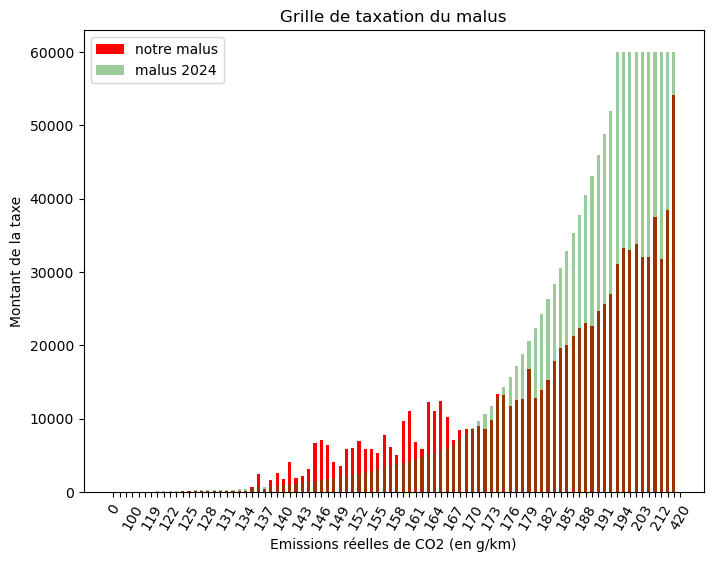

In [ ]:
# Créer le graphe
plt.figure(figsize=(8, 6))

# Tracer les barres
plt.bar(range(len(p)), 0.5*(result.x+malus_2024_reel), width=0.5, align='center', color='red', label='notre malus', alpha=1)
#plt.bar(range(len(p)), result.x, width=0.5, align='center', color='red', label='notre malus', alpha=1)
plt.bar(range(len(p)), malus_2024_reel, width=0.5, align='center', color='green', label='malus 2024',alpha=0.4)
#plt.bar(range(len(p)), malus_2021_reel, width=0.5, align='center', color='yellow', label='malus 2021',alpha=0.4)

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Définir les limites des axes x et y
plt.xticks(range(len(bins_limits)), valeur_entiere_liste(bins_limits), rotation =60)
plt.xlabel('Emissions réelles de CO2 (en g/km)')
plt.ylabel('Montant de la taxe')

# Ajouter des titres et des légendes
plt.title('Grille de taxation du malus')
plt.legend()
#plt.grid(True)

# Afficher le graphe
plt.show()

In [ ]:
malus_composite = 0.5*(malus_2024_reel+result.x)

constraint_function(malus_composite)

130.80110233721268

In [ ]:
from scipy.optimize import curve_fit

def modele_exponentiel(x, lambda_, alpha):
    return lambda_ * np.exp(alpha * x)

In [ ]:
np.linspace(100, 220, 90)

90

In [ ]:
parametres_optimaux, covariance = curve_fit(modele_exponentiel, np.linspace(100, 220, 90), result.x)

# Extraire les valeurs optimales de lambda et alpha
lambda_optimal, alpha_optimal = parametres_optimaux

In [ ]:
print(alpha_optimal)

0.9999999971699962


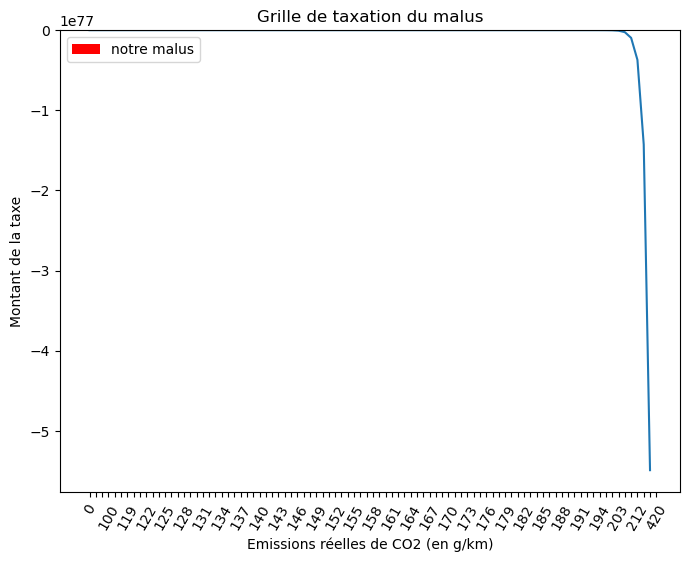

In [ ]:

plt.figure(figsize=(8, 6))

# Tracer les barres
plt.bar(range(len(p)), result.x, width=0.5, align='center', color='red', label='notre malus', alpha=1)
plt.plot(range(len(p)), modele_exponentiel(np.linspace(100, 220, 90), lambda_optimal, alpha_optimal))

def valeur_entiere_liste(L):
    C=[]
    for x in L:
        if len(C)%3==0:
            C.append(int(x))
        else:
            C.append(None)
    return C

# Définir les limites des axes x et y
plt.xticks(range(len(bins_limits)), valeur_entiere_liste(bins_limits), rotation =60)
plt.xlabel('Emissions réelles de CO2 (en g/km)')
plt.ylabel('Montant de la taxe')

# Ajouter des titres et des légendes
plt.title('Grille de taxation du malus')
plt.legend()
#plt.grid(True)

# Afficher le graphe
plt.show()

## 6. [TABLEAU MAIL] Comparaison des moyennes de co2 (part de marché estimé/observé, CO2 réel/théorique) et impact des malus sur les emissions de CO2

i- moyenne co2 théorique (pondérée par parts de marché observées)

ii- moyenne co2 théorique (pondérée par parts de marché contrefactuelles sans malus)

iii- baisse en pourcent permis grâce au malus en CO2 théorique ((observé-contrefactuel)/contrefactuel)

iv- moyenne co2 réel (pondérée par parts de marché observées)

v- moyenne co2 réel (pondérée par parts de marché contrefactuelles sans malus)

vi- baisse en pourcent permis grâce au malus en CO2 réel ((observée-contrefactuel)/contrefactuel)

In [ ]:
def utility_function_3(m):
    pexp = np.exp(delta+beta*(p+m))
    return(-np.sum(pexp))

# Fonction de contrainte  = moyenne des emissions réelles sur chacune des categories
def constraint_function(m):
    pexp = np.exp(delta+beta*(p+m))
    pit = pexp/np.sum(pexp)
    return(np.sum(pit*CO2reel))

## Pour malus 2021

In [ ]:
print("MALUS 2021")
print("\nCO2 théorique")
# pour 2021 dans datap
nb_vehicules = datap['VOLUME'].sum()

# i- moyenne co2 théorique (pondérée par parts de marché observées)
observe = (datap['mean_co2_theorique']*datap['VOLUME']).sum() / nb_vehicules 
print('Moyenne co2 théorique (observée): ', observe )


# ii- moyenne co2 théorique (pondérée par parts de marché contrefactuelles sans malus)
estimation_sans_malus = ( CO2theorique * part_de_marche(m_guess)).sum()
estimation_avec_malus2021 = ( CO2theorique * part_de_marche(malus_2021)).sum()
print('Moyenne co2 théorique (estimée sans malus): ',  estimation_sans_malus)
print('Moyenne co2 théorique (estimée avec malus 2021): ',  estimation_avec_malus2021)

# iii- baisse en pourcent permis grâce au malus en CO2 théorique ((observé-contrefactuel)/contrefactuel)
print('Baisse en pourcentage des emissions grace au malus en co2 théorique: ', ((estimation_sans_malus - estimation_avec_malus2021)/estimation_avec_malus2021)*100)



MALUS 2021

CO2 théorique
Moyenne co2 théorique (observée):  119.14878070141394
Moyenne co2 théorique (estimée sans malus):  121.78524356245109
Moyenne co2 théorique (estimée avec malus 2021):  129.5223767286784
Baisse en pourcentage des emissions grace au malus en co2 théorique:  -5.973588009765261


In [ ]:
# pour 2021 dans datap
print("\nCO2 réel")
nb_vehicules = datap['VOLUME'].sum()

# iv- moyenne co2 réel (pondérée par parts de marché observées)
observe = (datap['mean_co2_reel']*datap['VOLUME']).sum() / nb_vehicules 
print('Moyenne co2 réel (observée): ', observe )

# comparaison realite / estimation
estimation_sans_malus = ( CO2reel * part_de_marche(m_guess)).sum()
print('Moyenne co2 réel (estimée sans malus): ',  estimation_sans_malus)

# v- moyenne co2 réel (pondérée par parts de marché contrefactuelles sans malus)
estimation_avec_malus2021 = ( CO2reel * part_de_marche(malus_2021)).sum()
print('Moyenne co2 réel (estimée avec malus 2021): ',  estimation_avec_malus2021)

# vi- baisse en pourcent permis grâce au malus en CO2 réel ((observée-contrefactuel)/contrefactuel)
print('Baisse en pourcentage des emissions grace au malus en co2 réel: ', ((estimation_sans_malus - estimation_avec_malus2021)/estimation_avec_malus2021)*100)


CO2 réel
Moyenne co2 réel (observée):  141.41995121496478
Moyenne co2 réel (estimée sans malus):  144.04332780651887
Moyenne co2 réel (estimée avec malus 2021):  149.2354725684125
Baisse en pourcentage des emissions grace au malus en co2 réel:  -3.479162609622477


## Pour malus 2024

In [ ]:
print("\n\n\n MALUS 2024")
print("\nCO2 théorique")

# pour 2021 dans datap
nb_vehicules = datap['VOLUME'].sum()

# i- moyenne co2 théorique (pondérée par parts de marché observées)
observe = (datap['mean_co2_theorique']*datap['VOLUME']).sum() / nb_vehicules 
print('Moyenne co2 théorique (observée): ', observe )


# ii- moyenne co2 théorique (pondérée par parts de marché contrefactuelles sans malus)
estimation_sans_malus = ( CO2theorique * part_de_marche(m_guess)).sum()
estimation_avec_malus2024 = ( CO2theorique * part_de_marche(malus_2024_theorique)).sum()
print('Moyenne co2 théorique (estimée sans malus): ',  estimation_sans_malus)
print('Moyenne co2 théorique (estimée avec malus 2024): ',  estimation_avec_malus2024)

# iii- baisse en pourcent permis grâce au malus en CO2 théorique ((observé-contrefactuel)/contrefactuel)
print('Baisse en pourcentage des emissions grace au malus en co2 théorique: ', ((estimation_sans_malus - estimation_avec_malus2024)/estimation_avec_malus2024)*100)




 MALUS 2024

CO2 théorique
Moyenne co2 théorique (observée):  119.14878070141394
Moyenne co2 théorique (estimée sans malus):  121.78524356245109
Moyenne co2 théorique (estimée avec malus 2024):  117.40670626611914
Baisse en pourcentage des emissions grace au malus en co2 théorique:  3.729375804485443


In [ ]:
print("\nCO2 réel")
# pour 2021 dans datap
nb_vehicules = datap['VOLUME'].sum()

# iv- moyenne co2 réel (pondérée par parts de marché observées)
observe = (datap['mean_co2_reel']*datap['VOLUME']).sum() / nb_vehicules 
print('Moyenne co2 réel (observée): ', observe )

# comparaison realite / estimation
estimation_sans_malus = ( CO2reel * part_de_marche(m_guess)).sum()
print('Moyenne co2 réel (estimée sans malus): ',  estimation_sans_malus)

# v- moyenne co2 réel (pondérée par parts de marché contrefactuelles sans malus)
estimation_avec_malus2024 = ( CO2reel * part_de_marche(malus_2024_theorique)).sum()
print('Moyenne co2 réel (estimée avec malus 2024): ',  estimation_avec_malus2024)

# vi- baisse en pourcent permis grâce au malus en CO2 réel ((observée-contrefactuel)/contrefactuel)
print('Baisse en pourcentage des emissions grace au malus en co2 réel: ', ((estimation_sans_malus - estimation_avec_malus2024)/estimation_avec_malus2024)*100)


CO2 réel
Moyenne co2 réel (observée):  141.41995121496478
Moyenne co2 réel (estimée sans malus):  144.04332780651887
Moyenne co2 réel (estimée avec malus 2024):  139.41043443821752
Baisse en pourcentage des emissions grace au malus en co2 réel:  3.323204168303852


## Pour notre malus

In [ ]:
print("\n\n\n NOTRE MALUS")
print("\nCO2 theorique")
# pour 2021 dans datap
nb_vehicules = datap['VOLUME'].sum()

# i- moyenne co2 théorique (pondérée par parts de marché observées)
observe = (datap['mean_co2_theorique']*datap['VOLUME']).sum() / nb_vehicules 
print('Moyenne co2 théorique (observée): ', observe )


# ii- moyenne co2 théorique (pondérée par parts de marché contrefactuelles sans malus)
estimation_sans_malus = ( CO2theorique * part_de_marche(m_guess)).sum()
estimation_avec_notre_malus = ( CO2theorique * part_de_marche(m)).sum()
print('Moyenne co2 théorique (estimée sans malus): ',  estimation_sans_malus)
print('Moyenne co2 théorique (estimée avec notre malus): ',  estimation_avec_notre_malus)

# iii- baisse en pourcent permis grâce au malus en CO2 théorique ((observé-contrefactuel)/contrefactuel)
print('Baisse en pourcentage des emissions grace au malus en co2 théorique: ', ((estimation_sans_malus - estimation_avec_notre_malus)/estimation_avec_notre_malus)*100)




 NOTRE MALUS

CO2 theorique
Moyenne co2 théorique (observée):  119.14878070141394
Moyenne co2 théorique (estimée sans malus):  121.78524356245109
Moyenne co2 théorique (estimée avec notre malus):  106.00999277590532
Baisse en pourcentage des emissions grace au malus en co2 théorique:  14.880909217580172


In [ ]:
print("\nCO2 réel")
# pour 2021 dans datap
nb_vehicules = datap['VOLUME'].sum()

# iv- moyenne co2 réel (pondérée par parts de marché observées)
observe = (datap['mean_co2_reel']*datap['VOLUME']).sum() / nb_vehicules 
print('Moyenne co2 réel (observée): ', observe )

# comparaison realite / estimation
estimation_sans_malus = ( CO2reel * part_de_marche(m_guess)).sum()
print('Moyenne co2 réel (estimée sans malus): ',  estimation_sans_malus)

# v- moyenne co2 réel (pondérée par parts de marché contrefactuelles sans malus)
estimation_avec_notre_malus = ( CO2reel * part_de_marche(m)).sum()
print('Moyenne co2 réel (estimée avec notre malus): ',  estimation_avec_malus2024)

# vi- baisse en pourcent permis grâce au malus en CO2 réel ((observée-contrefactuel)/contrefactuel)
print('Baisse en pourcentage des emissions grace au malus en co2 réel: ', ((estimation_sans_malus - estimation_avec_malus2024)/estimation_avec_malus2024)*100)


CO2 réel
Moyenne co2 réel (observée):  141.41995121496478
Moyenne co2 réel (estimée sans malus):  144.04332780651887
Moyenne co2 réel (estimée avec notre malus):  139.41043443821752
Baisse en pourcentage des emissions grace au malus en co2 réel:  3.323204168303852
